## This cell imports most of the necessary modules, polygon outlines and creates colour maps that are used later

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.patheffects as path_effects
from IPython.display import HTML

import numpy as np
import pandas as pd
from scipy.stats import pearsonr,spearmanr

from ebov_data import *

if locations:
    pass
else:
    status()
    setFocusCountries()
    setColourMaps()
    loadData()

## set default matplotlib font and font size
typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

path='<iframe style="border: 0; width: 400px; height: 372px;" src="https://bandcamp.com/EmbeddedPlayer/album=1015754526/size=large/bgcol=333333/linkcol=e99708/artwork=small/track=867144022/transparent=true/" seamless><a href="http://sefektas.bandcamp.com/album/monotonijos-anatomija">Monotonijos Anatomija by Sraiges efektas</a></iframe>'

print 'Done!'
HTML(path)

Operating system:       Darwin (15.6.0)
Python version:         2.7.12
Numpy version:          1.11.3
Pandas version:         0.18.1
matplotlib version:      2.0.0
scipy version:          0.18.1

This notebook was last run on:
Sunday	2017-Feb-26	16:59	PDT
Done!


## This cell imports predictor matrices that will be plotted later.

Number of datatypes: 56

predictors found in file: 25
predictor matrices: 25
predictor descriptions: 25
destinationTT100k estimated mean travel time in minutes to reach the nearest major settlement of at least 100,000 people at destination, ln-transformed, standardized
originPrec Precipitation annual mean at origin, ln-transformed, standardized
destinationTemp Temperature annual mean at destination, ln-transformed, standardized
international_border_shared location pairs that are in different countries and share a border
betweenLBR_GIN_Assymetry between Liberia-Guinea assymetry
originTT100k estimated mean travel time in minutes to reach the nearest major settlement of at least 100,000 people at origin, ln-transformed, standardized
national_language_shared location pairs that are in the same country and share a language
destinationPdens destination population density, ln-transformed, standardized
destinationTmpss index of temperature seasonality at destination, ln-transformed, standardiz

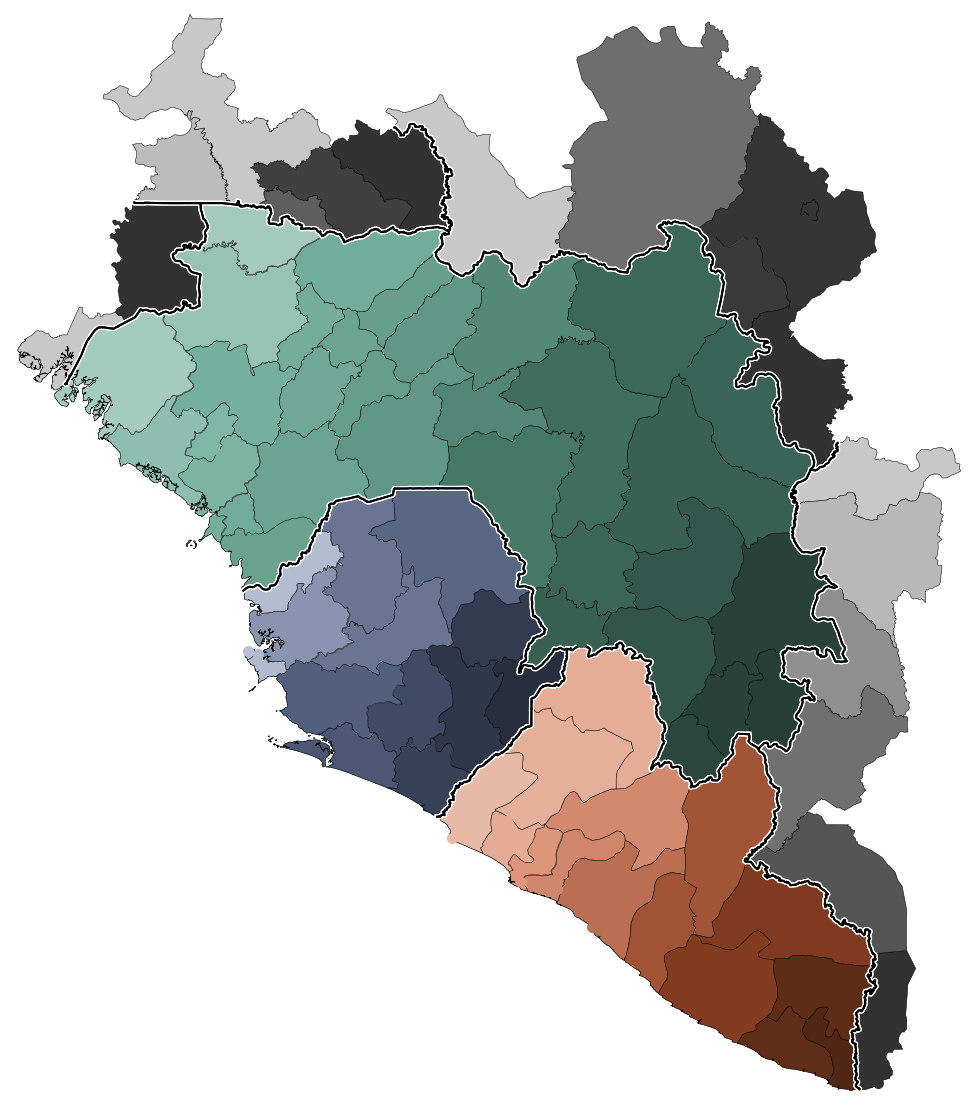

Done!


In [3]:
#########################################################################################
#### IMPORT PREDICTOR MATRICES    #######################################################
#########################################################################################
dtypes_path=path_to_dropbox+'Sequences/Aug2016_1610_genomes/Joint/HomogenousGLM/All_1610/Run1/Makona_1610_cds_ig.joint_GLM.xml'

xml_districts=[]
read_loc=False
for line in open(dtypes_path,'r'):
    if 'location.dataType' in line:
        read_loc=True
    #print line
    cerberus=re.search('<state code="([A-Za-z]+)"/>',line)
    if read_loc==True and cerberus is not None:
        xml_districts.append(cerberus.group(1))

print 'Number of datatypes: %d'%(len(xml_districts))
        
## matrix indexing
matrix_index={}
lg=len(xml_districts)
for i in range(len(xml_districts)):
    for j in range(i+1,len(xml_districts)):
        f1=int((lg*(lg-1)/2) - (lg-i)*((lg-i)-1)/2 + j - i - 1)
        f2=int((lg*(lg-1)) - (lg-i)*((lg-i)-1)/2 + j - i - 1)

        matrix_index[f1]=(xml_districts[i],xml_districts[j])
        matrix_index[f2]=(xml_districts[j],xml_districts[i])

predictor_matrices={}
predictor_description={}
counter=0
description_comment=''
store=''
for line in open(dtypes_path,'r'):
    ## find matrix
    if store!='<!--\n':
        matrix=re.search('<parameter id="([A-Za-z0-9\_]+)" value="([0-9\.\- Ee]+)" */>',line)
#         if matrix is not None:
#             print description_comment,store
        if matrix is not None and description_comment!='':
            predictor=matrix.group(1)
            
            float_matrix=map(float,matrix.group(2).strip(' ').split(' '))
            if len(float_matrix)==(len(xml_districts)**2-len(xml_districts)):
                predictor_matrices[predictor]=float_matrix
                predictor_description[predictor]=description_comment
                description_comment=''
                #print 'predictor name:',predictor,len(float_matrix)
#     else:
#         counter-=1

    ## find description of matrix
    description_comment=re.search('<!-- predictor [0-9]+: ([\(\)A-Za-z0-9, \-\.\+>]+) +-->',line)
    if description_comment is not None:
        description_comment=description_comment.group(1)
        counter+=1
        #print '\npredictor description:',description_comment,counter
    else:
        description_comment=''
    store=line
    
print '\npredictors found in file: %s\npredictor matrices: %s\npredictor descriptions: %s'%(counter,len(predictor_matrices),len(predictor_description))
# print predictor_description

for predictor in predictor_matrices.keys():
    if predictor_description[predictor]!=None:
        print predictor,predictor_description[predictor]
    else:
        predictor_matrices.pop(predictor)

#########################################################################################
#### IMPORT PREDICTOR MATRICES    #######################################################
#########################################################################################

## start figure
fig,ax = plt.subplots(figsize=(20,20),facecolor='w')

print '\nLocations in the map are normalized by %s'%(normalize_by)

for i,loc in enumerate(locations):
    country=location_to_country[loc]

    if country in required_countries:

        countryColour=colours[country]
        c=desaturate(countryColour(normalized_coords[loc]),0.8)

        ## plot population centres
        lon,lat=popCentres[loc]

        ## plot district names at centre
        ax.scatter(lon,lat,100,facecolor=c,zorder=100)

        ## plot district polygons
        ax.add_collection(PatchCollection(polygons[loc],facecolor=c,edgecolor='k',lw=0.5,zorder=0))

for local_border in global_border:
    ax.plot(column(local_border,0),column(local_border,1),color='k',lw=2,zorder=99)
    ax.plot(column(local_border,0),column(local_border,1),color='w',lw=5,zorder=98)

## make plot pretty
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_ylim(ylimits)
ax.set_xlim(xlimits)

ax.set_aspect(1)

plt.show()
print 'Done!'

## This cell plots predictors onto maps
- "destination" or "origin" predictors are plotted by colouring the map
- pairwise comparisons are plotted by connecting population centres with lines

0 0 0 destinationPrec
1 0 1 destinationTemp
2 0 2 destinationGecon
3 1 0 destinationPdens
4 1 1 destinationPop_Size
5 1 2 destinationTT100k
6 2 0 destinationPrecss
7 2 1 destinationTmpss


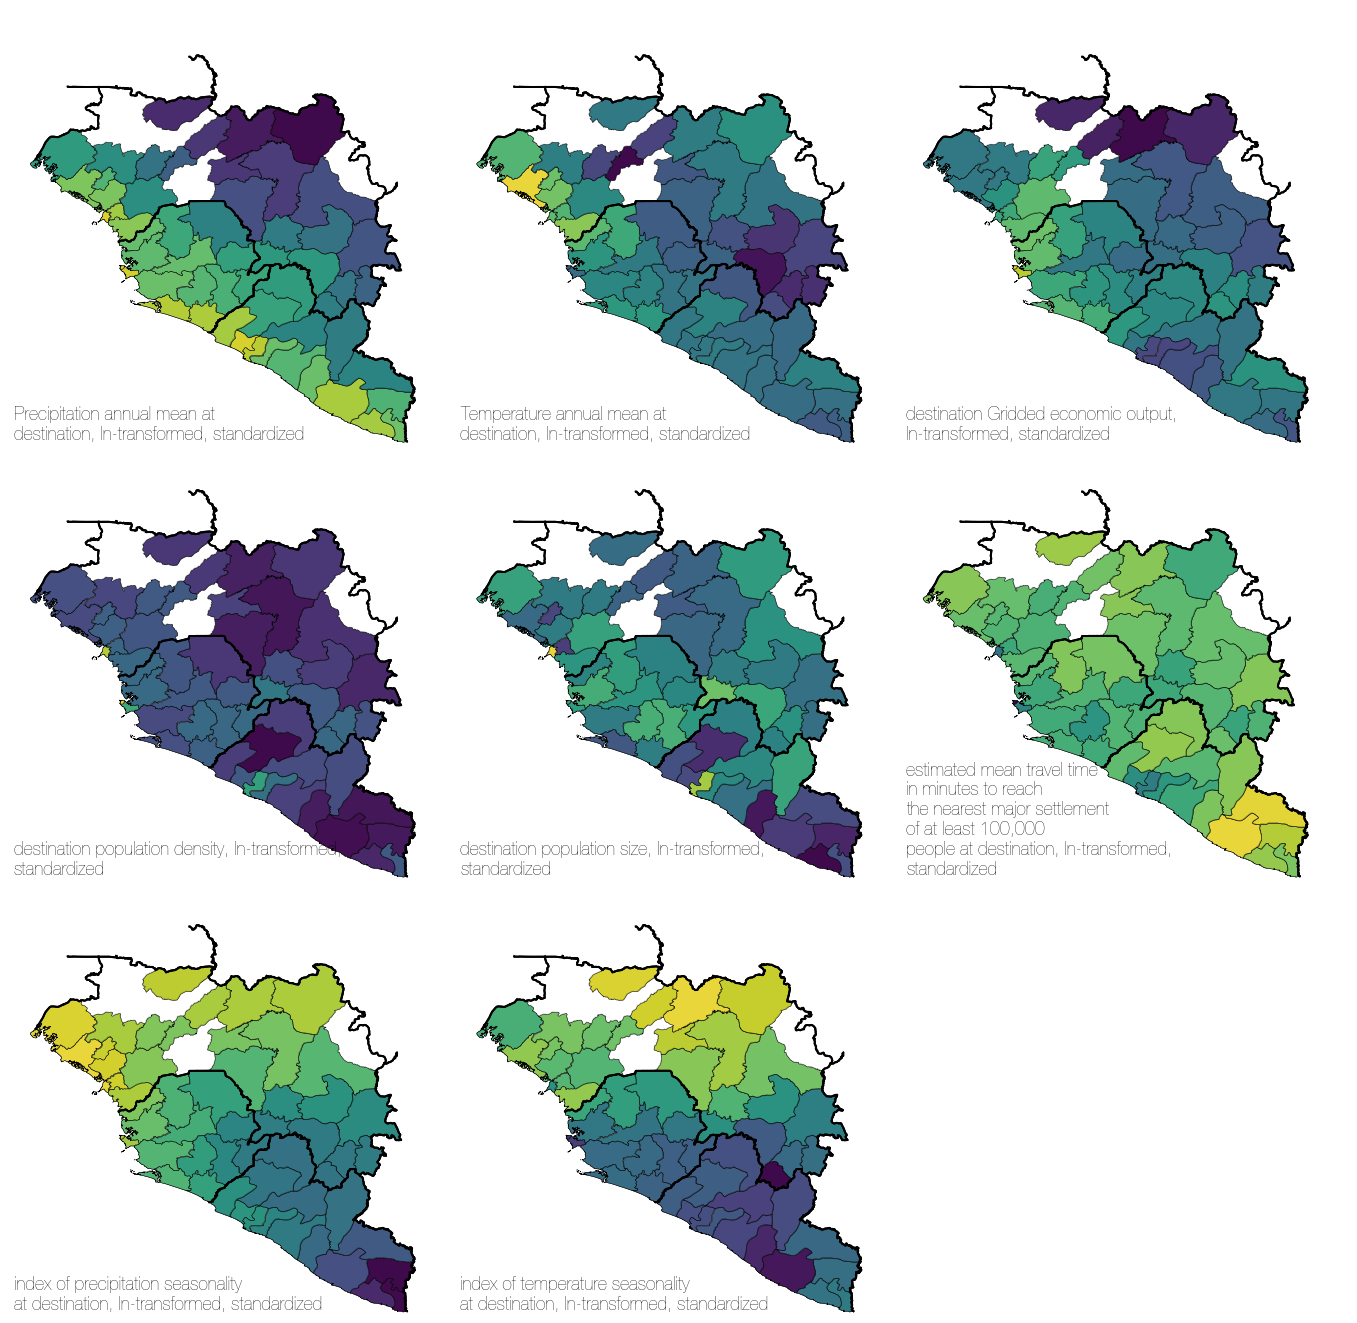

In [4]:
rows=3
cols=3

plt.figure(figsize=(cols*8,rows*8),facecolor='w')

## define subplots
gs = gridspec.GridSpec(rows, cols,hspace=0.0,wspace=0.0)

required=sorted([x for x in predictor_matrices.keys() if 'destination' in x],key=lambda d:predictor_description[d])

cmap=mpl.cm.get_cmap('viridis')

for p,predictor in enumerate(required):
    
    row=int(p/cols)
    
    if row==0:
        col=p
    else:
        col=p%cols
        
    print p,row,col,predictor
    
    ax = plt.subplot(gs[row, col])

    for i,loc in enumerate(xml_districts):
        country=location_to_country[loc]
        if country in required_countries:

            countryColour=colours[country]
            c=desaturate(countryColour(normalized_coords[loc]),0.8)

            ## transform predictor value into the range [0,1]
            omin=min(predictor_matrices[predictor])
            omax=max(predictor_matrices[predictor])
            nmin=0.0
            nmax=1.0
            newRange=nmax-nmin
            oldRange=omax-omin

            destinations={}

            med=np.median(predictor_matrices[predictor])

            for ind,value in enumerate(predictor_matrices[predictor]):
                ori,dest=matrix_index[ind]
                #oriX,oriY=popCentres[ori]
                #destX,destY=popCentres[dest]

                ## normalize entire range to be within range [0,1]
                normalizeValue=(((value-omin)*newRange)/float(oldRange)) + nmin
                destinations[dest]=normalizeValue

            ## fc is alternative
            fc=desaturate(cmap(destinations[loc]),0.8)

            ## plot district borders
            for part in location_points[loc]:
                ax.plot(column(part,0),column(part,1),lw=0.1,color='k',zorder=200)

            ## plot population centres
            lon,lat=popCentres[loc]

            ## plot district polygons
            ax.add_collection(PatchCollection(polygons[loc],facecolor=fc,edgecolor='k',lw=0.5,zorder=0))

    ## make plot pretty
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(size=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(ylimits)
    ax.set_xlim(xlimits)

    for local_border in global_border:
        ax.plot(column(local_border,0),column(local_border,1),color='k',lw=2,zorder=201)

    break_at=4
    break_description='\n'.join([' '.join([y for y in predictor_description[predictor].split(' ')[x:x+break_at]]) for x in range(0,len(predictor_description[predictor].split(' ')),break_at)])

    ax.text(0.01,0.01,break_description,size=18,transform=ax.transAxes)

# plt.savefig(local_output+'EBOV_destinationMap.png',dpi=300,bbox_inches='tight')
# plt.savefig(local_output+'EBOV_destinationMap.pdf',dpi=300,bbox_inches='tight')
plt.show()

destinationTT100k


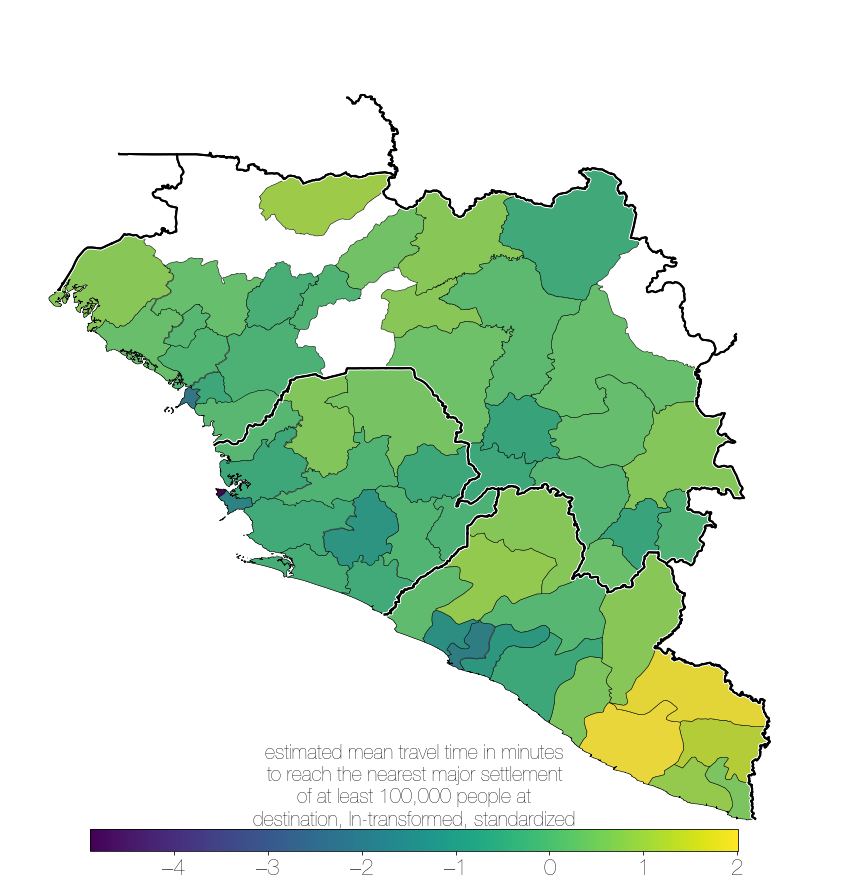

destinationTemp


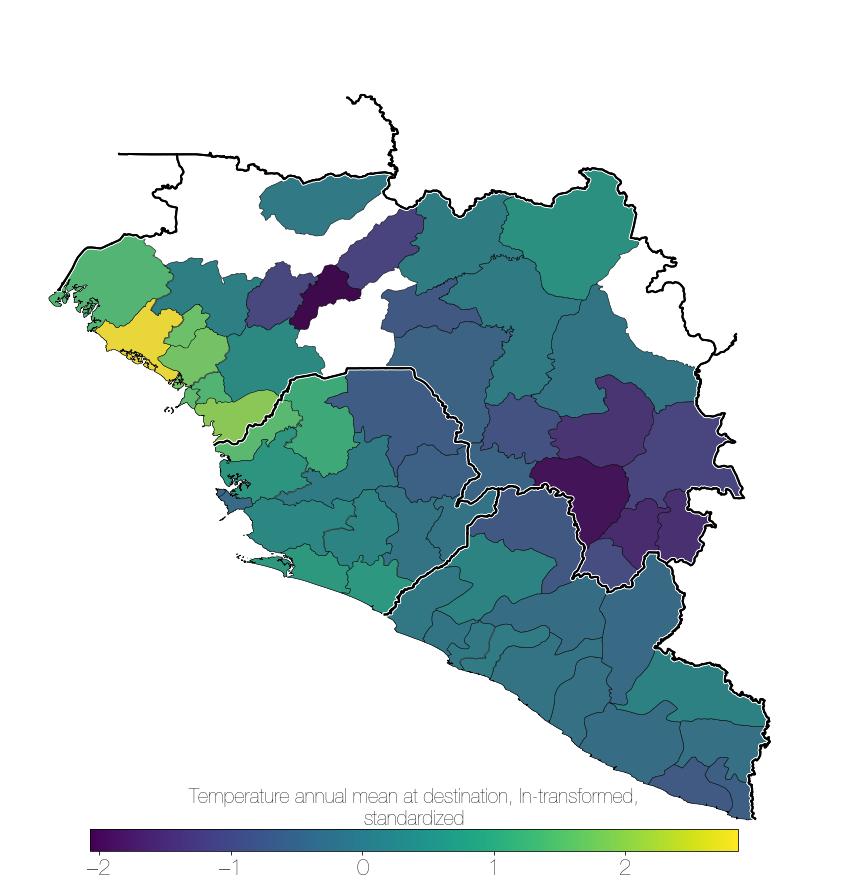

international_border_shared


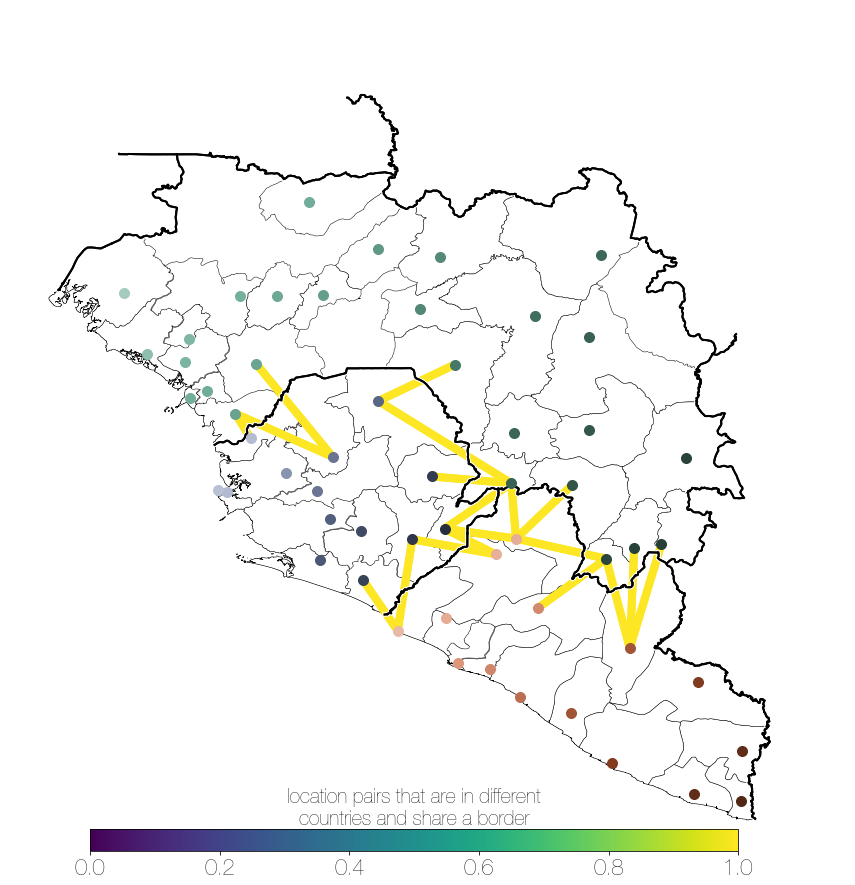

national_language_shared


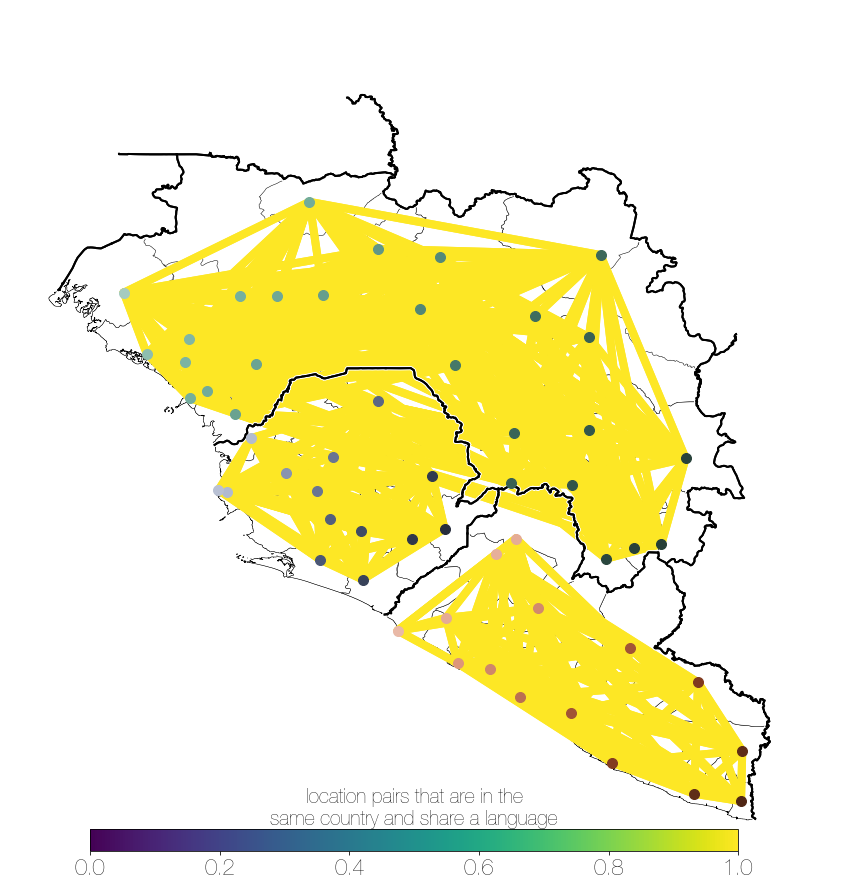

destinationPdens


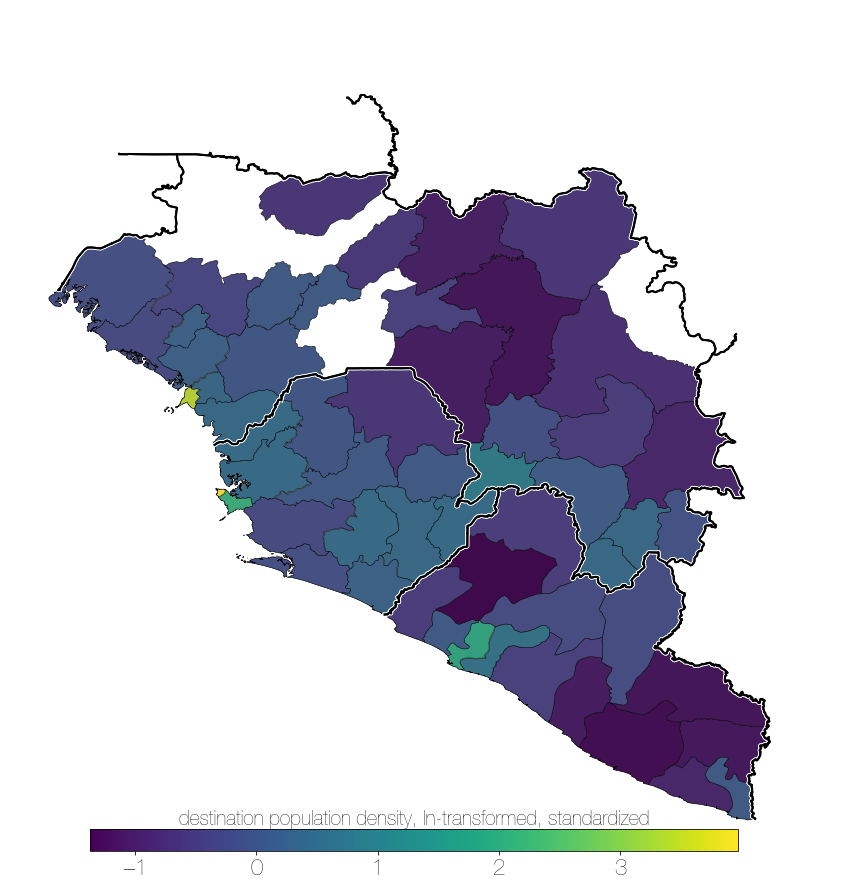

destinationTmpss


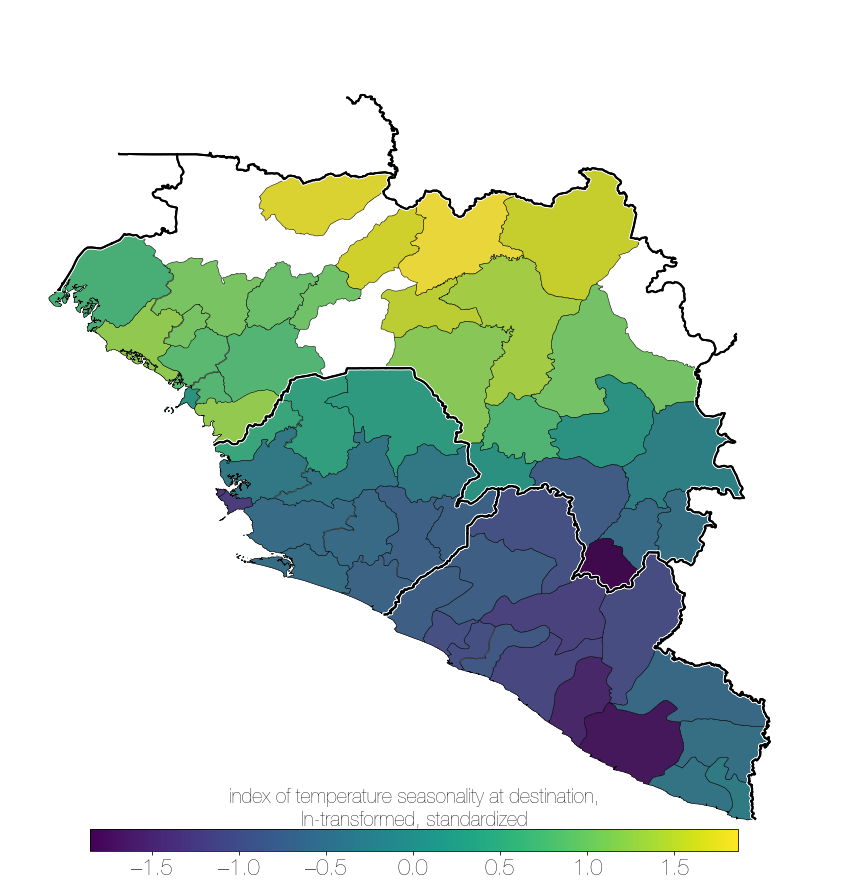

destinationGecon


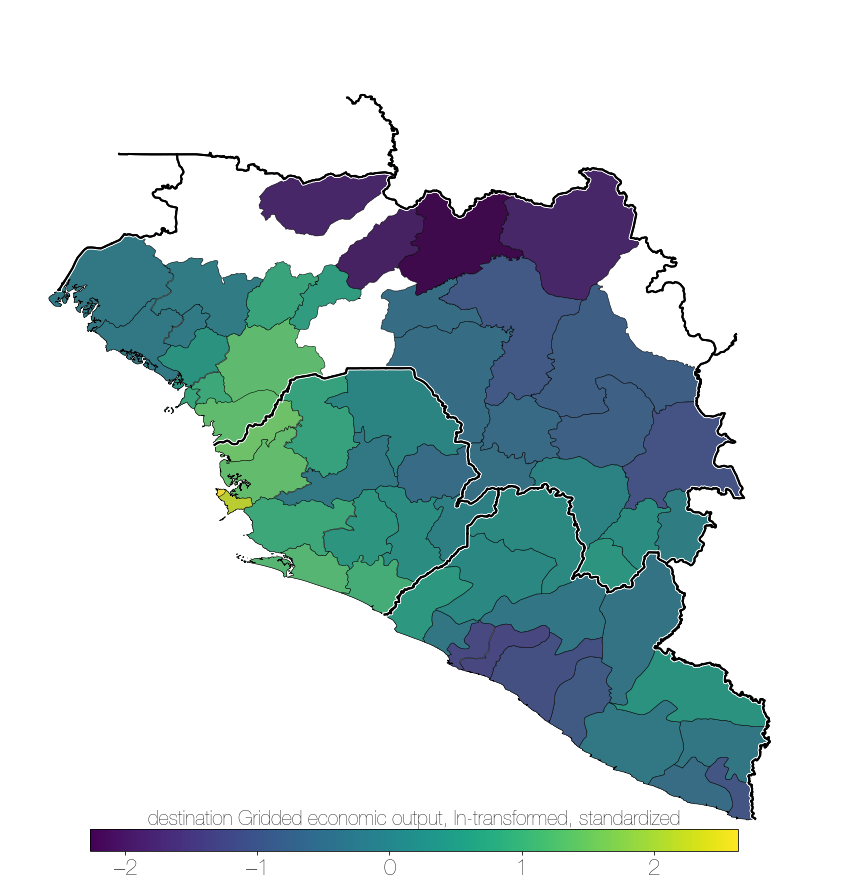

international_language_shared


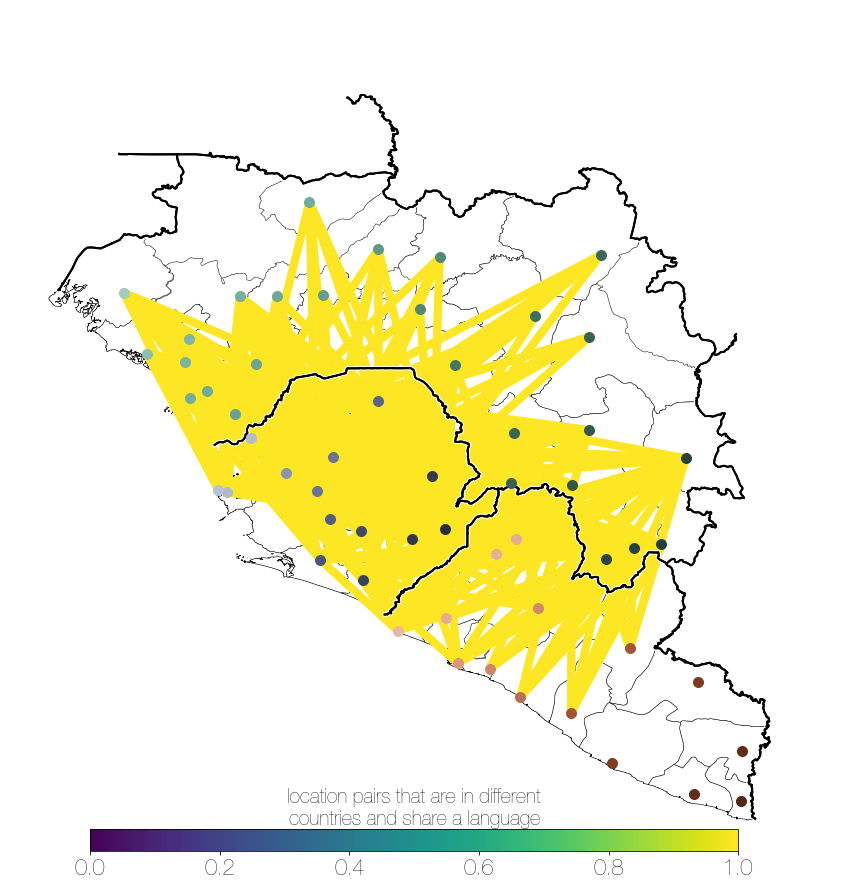

destinationPrecss


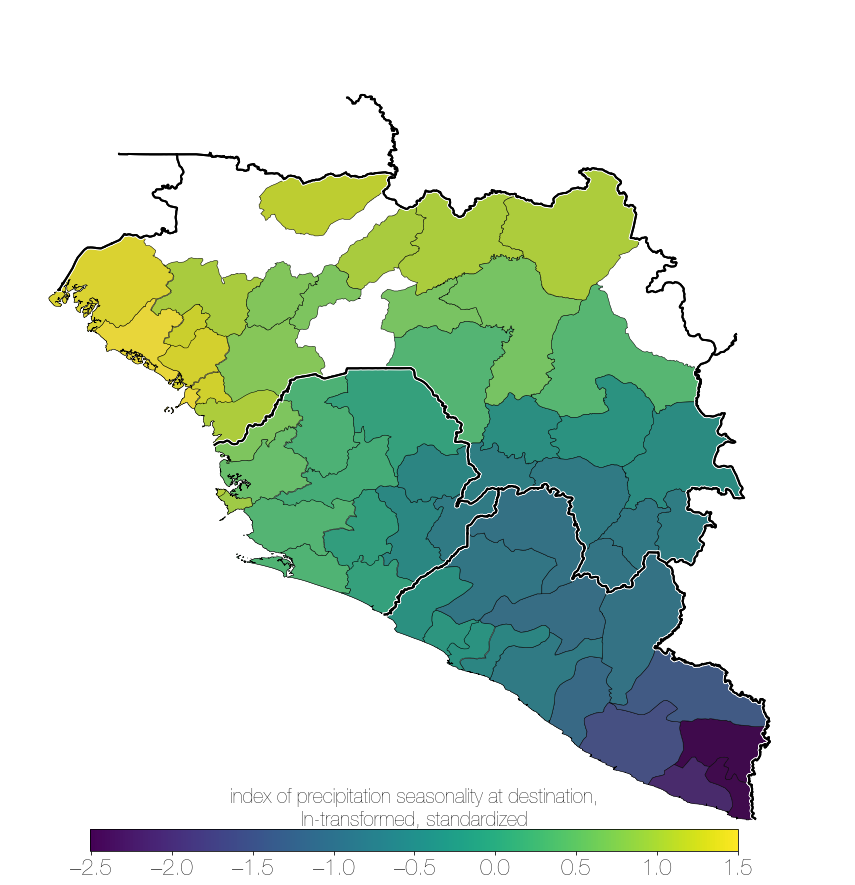

destinationPop_Size


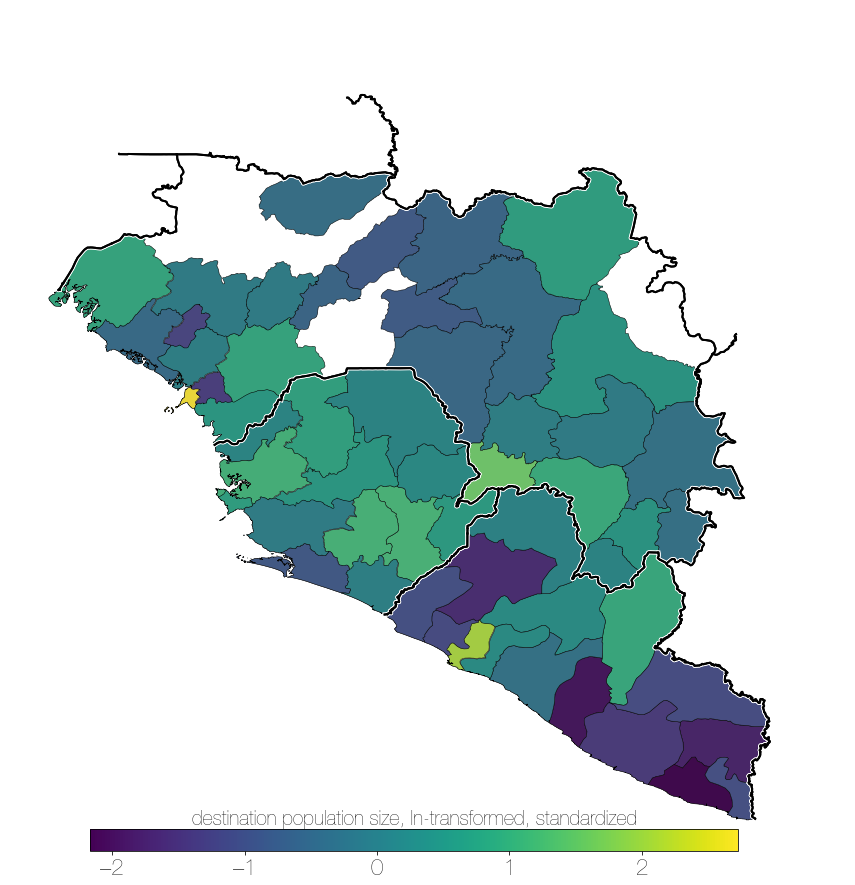

greatCircleDistances


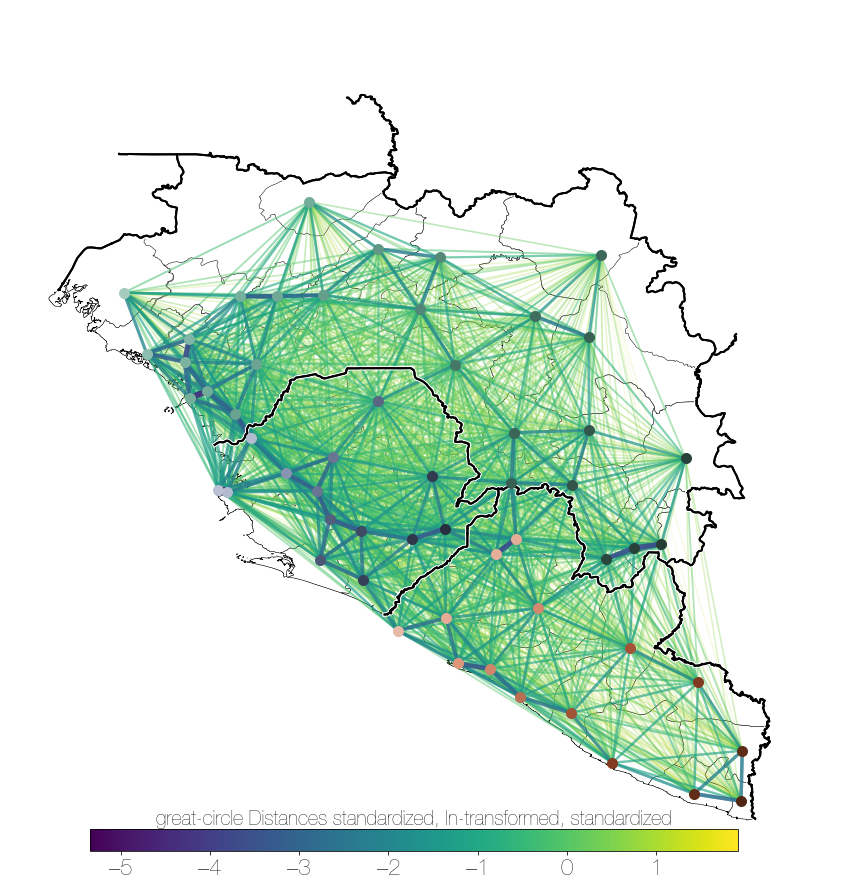

destinationPrec


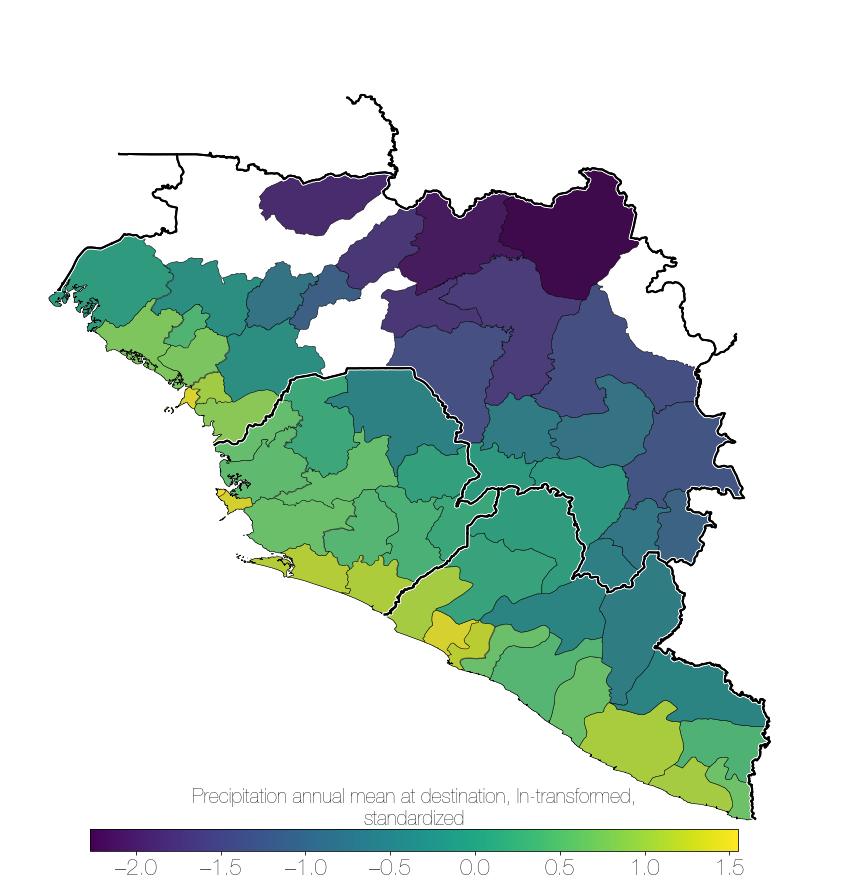

within_country


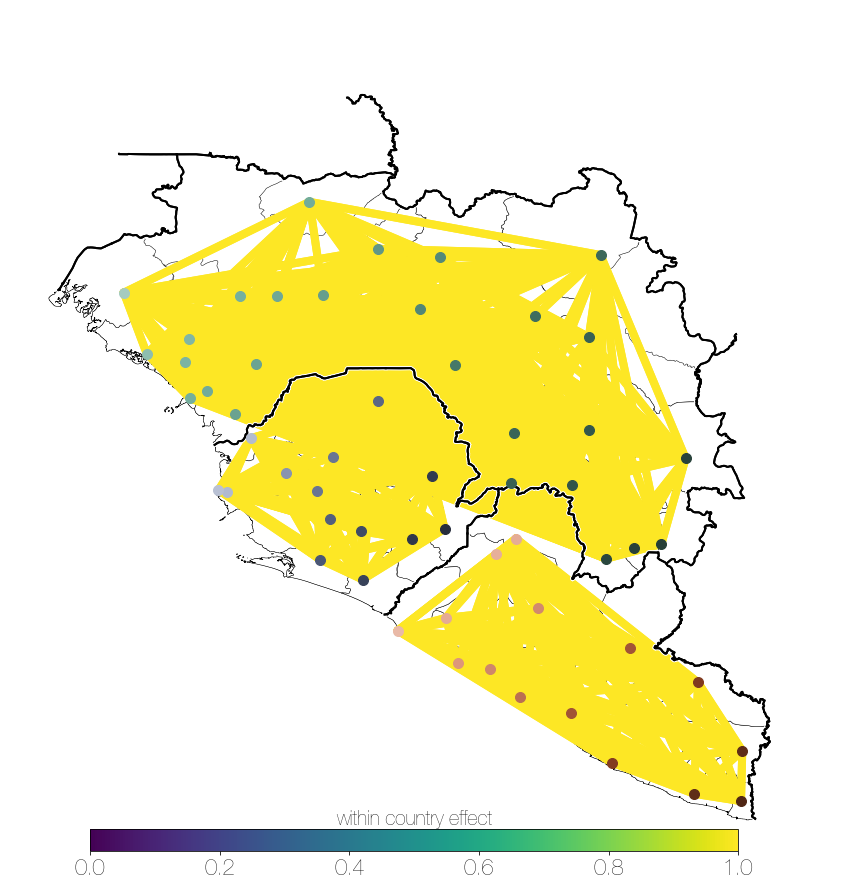

national_border_shared


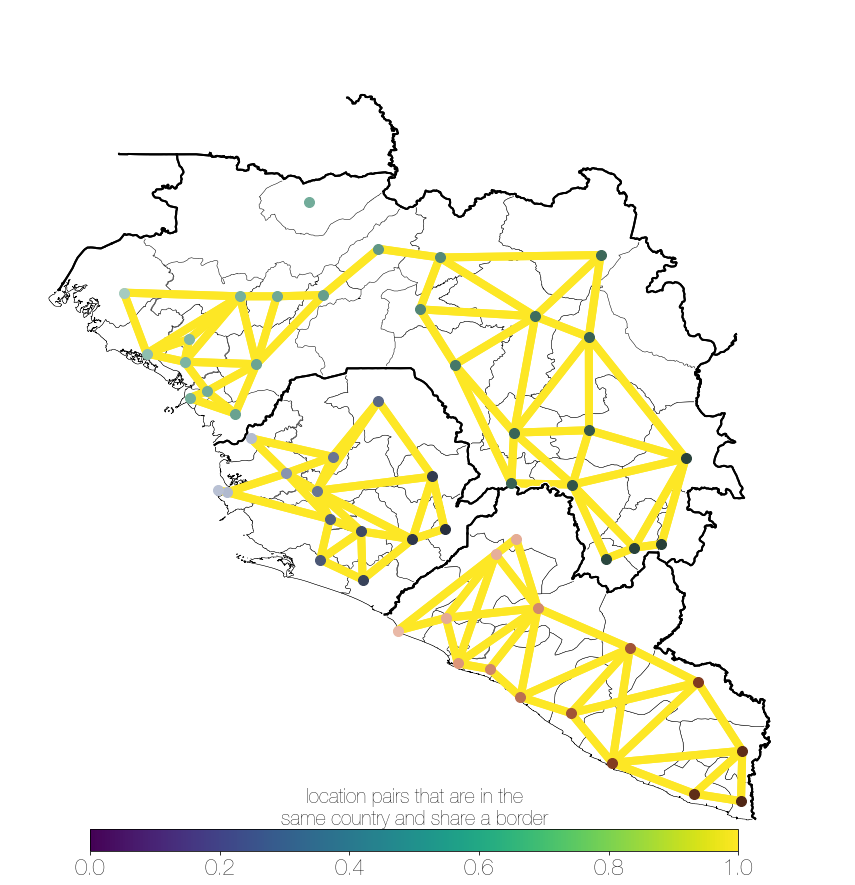

In [5]:
# required=['international_language_shared']
required=predictor_matrices.keys()

# cmap=mpl.cm.cubehelix_r
# cmap=mpl.cm.get_cmap('viridis_r')
cmap=mpl.cm.get_cmap('viridis')
# cmap_alt=mpl.cm.Purples
cmap_alt=mpl.cm.get_cmap('viridis')

# not_required=['origin','Assymetry','within']
not_required=['origin','Assymetry']

for predictor in required:
    if [x in predictor for x in not_required].count(False)==len(not_required):
#     if 'origin' not in predictor:
        print predictor
        ## start figure
        fig,ax = plt.subplots(figsize=(15,15),facecolor='w')

        ## transform predictor value into the range [0,1]
        omin=min(predictor_matrices[predictor])
        omax=max(predictor_matrices[predictor])
        nmin=0.0
        nmax=1.0
        newRange=nmax-nmin
        oldRange=omax-omin

        destinations={}
        
        med=np.median(predictor_matrices[predictor])
        
        for ind,value in enumerate(predictor_matrices[predictor]):
            ori,dest=matrix_index[ind]
            oriX,oriY=popCentres[ori]
            destX,destY=popCentres[dest]

            ## normalize entire range to be within range [0,1]
            normalizeValue=(((value-omin)*newRange)/float(oldRange)) + nmin
            
            alpha=normalizeValue
            zorder=int(normalizeValue*100)-1
            proceed=True
            lw=8**normalizeValue
            
            exceptions=['Distance','KL']
            mask0s=['sharedBorder','language_BinaryShared']
            
            if [exception in predictor for exception in exceptions].count(True)>=1:
                zorder=int((1-normalizeValue)*100)-1
                alpha=1-normalizeValue
                lw=8**(1-normalizeValue)
            
            if [mask0 in predictor for mask0 in mask0s].count(True)>=1:
                if value==0.0:
                    proceed=False
            
            ## if predictor is destination/origin effect or discrete states shared by countries
            # remember destination value, otherwise connect population centres
            if proceed==True:
                if 'destination' not in predictor:
                    ax.plot([oriX,destX],[oriY,destY],color=cmap(normalizeValue),lw=lw,alpha=alpha,solid_capstyle='round',zorder=zorder)
                else:
                    destinations[dest]=normalizeValue
                
        
        districtPolygons={}
        for i,loc in enumerate(xml_districts):
#             country,location=loc.split('_')
            country=location_to_country[loc]
            
            if country in required_countries:
    
                countryColour=colours[country]
                c=desaturate(countryColour(normalized_coords[loc]),0.8)

                if 'destination' in predictor:
                    ## fc is alternative
                    fc=desaturate(cmap_alt(destinations[loc]),0.8)

                ## plot population centres
                lon,lat=popCentres[loc]

                ## if predictor goes both ways districts are white with coloured centres
                if 'destination' not in predictor:
                    fc='w'
                    ## plot district names at centre
                    ax.scatter(lon,lat,100,facecolor=c,zorder=203)

                ## plot district polygons
                ax.add_collection(PatchCollection(polygons[loc],facecolor=fc,edgecolor='k',lw=0.5,zorder=0))

        ## make plot pretty
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(size=0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(ylimits)
        ax.set_xlim(xlimits)

        ## add colorbars
        axcb = fig.add_axes([0.2, 0.1, 0.6, 0.02], frame_on=False)
        if 'destination' not in predictor:
            cb = mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=mpl.colors.Normalize(vmin=min(predictor_matrices[predictor]),vmax=max(predictor_matrices[predictor])),orientation='horizontal',alpha=1.0,drawedges=False)
        elif 'within' in predictor or 'between' in predictor:
            pass
        else:
            cb = mpl.colorbar.ColorbarBase(axcb,cmap=cmap_alt,norm=mpl.colors.Normalize(vmin=min(predictor_matrices[predictor]),vmax=max(predictor_matrices[predictor])),orientation='horizontal',alpha=1.0,drawedges=False)

        break_at=6
        break_description='\n'.join([' '.join([y for y in predictor_description[predictor].split(' ')[x:x+break_at]]) for x in range(0,len(predictor_description[predictor].split(' ')),break_at)])

        axcb.xaxis.set_label_position("top")
        axcb.set_xlabel('%s'%(break_description),size=20)
        axcb.xaxis.labelpad=5

        axcb.tick_params(axis='y',which='both',direction='out',size=12,width=1,pad=10)
        plt.setp(axcb.get_yticklabels(),size=32,name=typeface)
        for tick in axcb.yaxis.get_ticklines():
            tick.set_markersize(10)

        for local_border in global_border:
            ax.plot(column(local_border,0),column(local_border,1),color='k',lw=2,zorder=201)
            ax.plot(column(local_border,0),column(local_border,1),color='w',lw=4,zorder=200)

#         plt.savefig(local_output+'EBOV_predictorMap_%s.png'%(predictor),dpi=300,bbox_inches='tight')
#         plt.savefig(local_output+'EBOV_predictorMap_%s.pdf'%(predictor),dpi=300,bbox_inches='tight')
        plt.show()

## This cell plots predictors as a matrix if they are not "destination" or "origin" predictors.

{'LBR': -10.2979890098, 'MLI': -11.22604754, 'GNB': -14.76736151, 'CIV': -7.74687139, 'GIN': -8.52624969311, 'SEN': -13.74808121, 'SLE': -12.1739735377}
international_border_shared 38.0


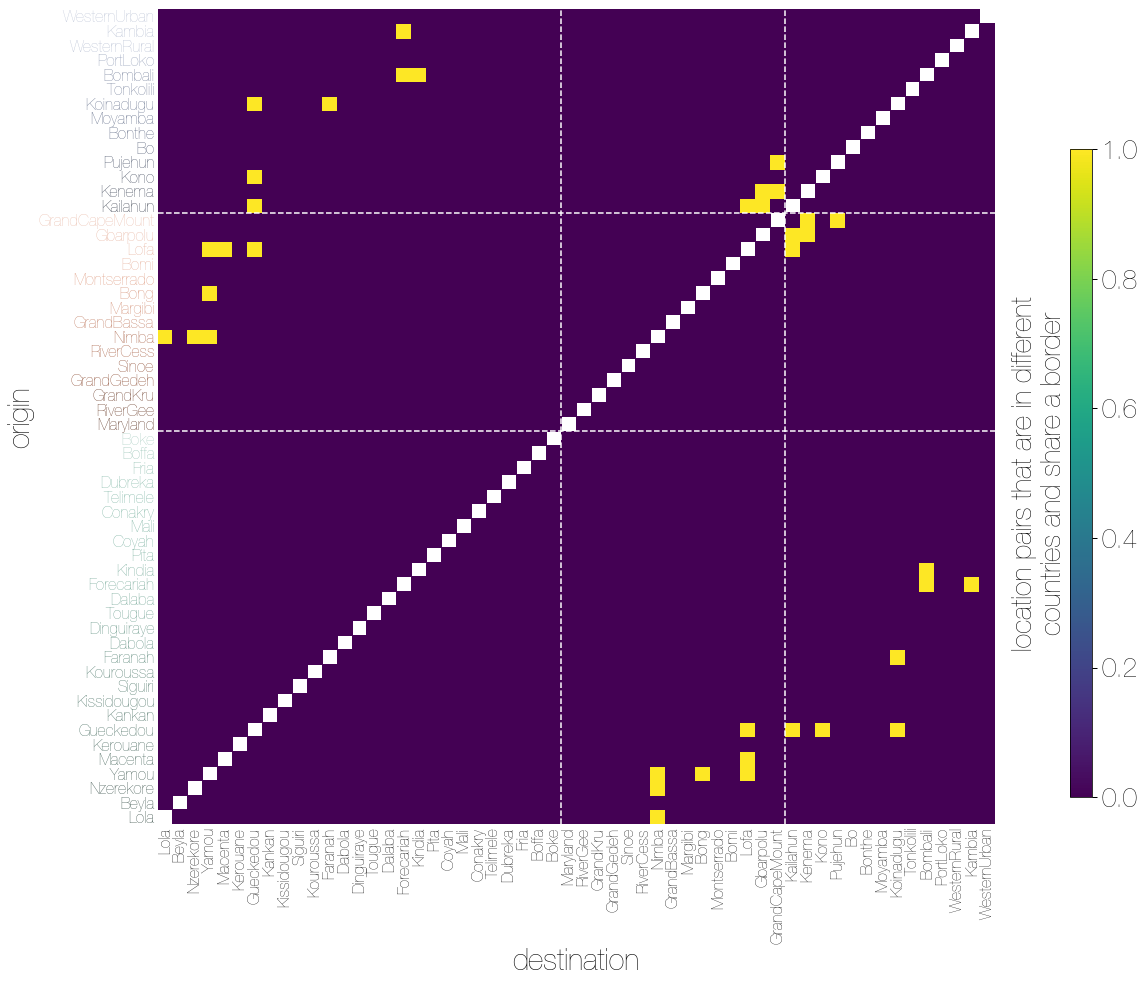

betweenLBR_GIN_Assymetry 0.0


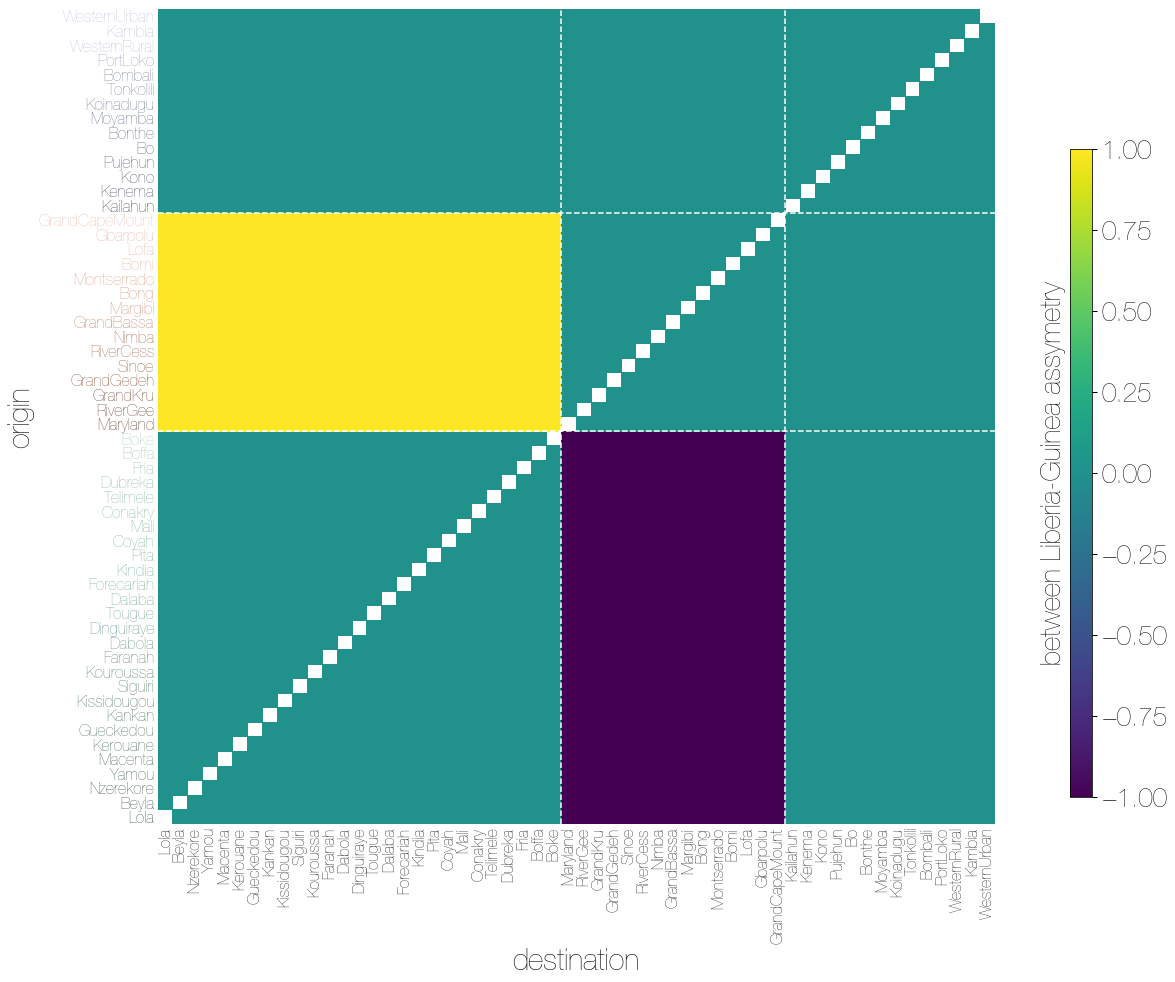

national_language_shared 876.0


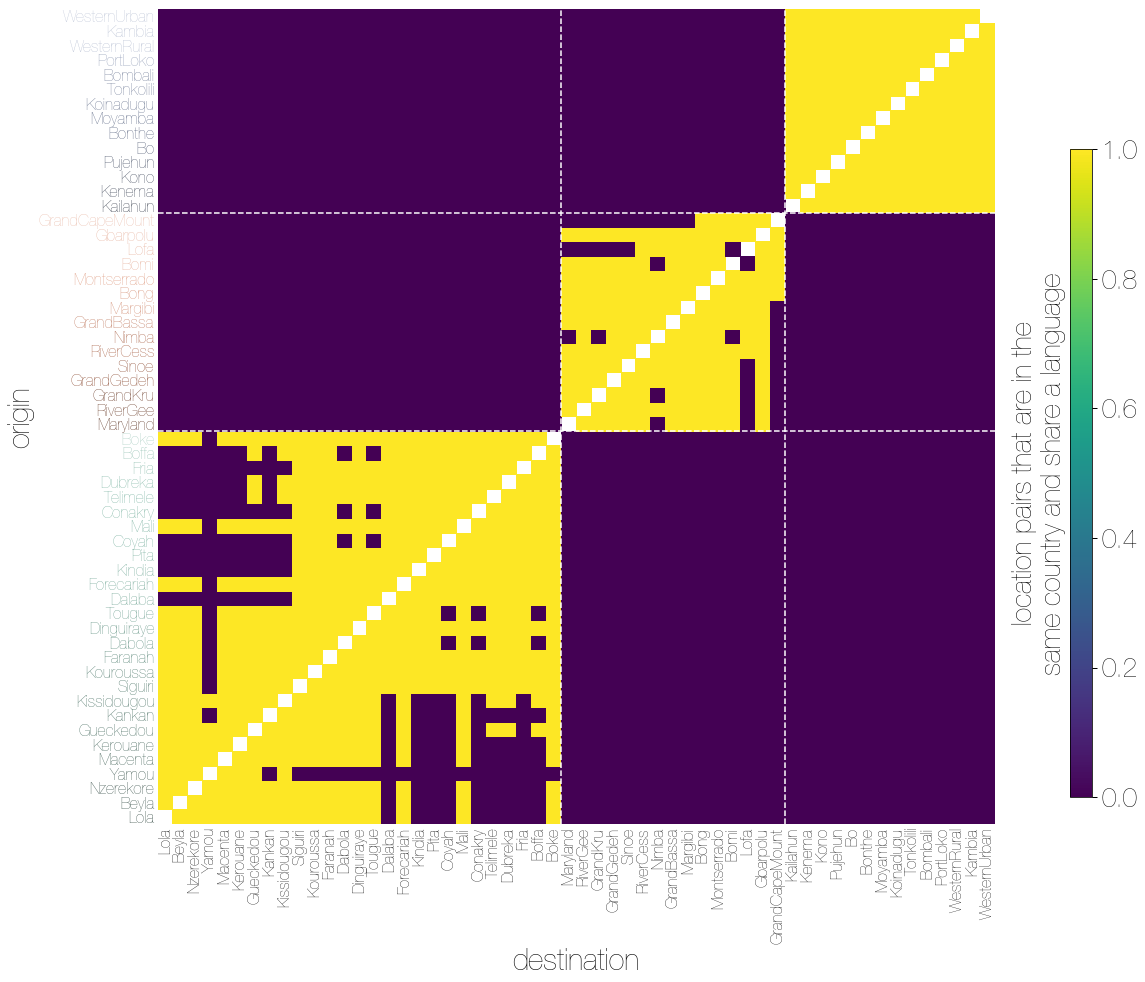

international_language_shared 626.0


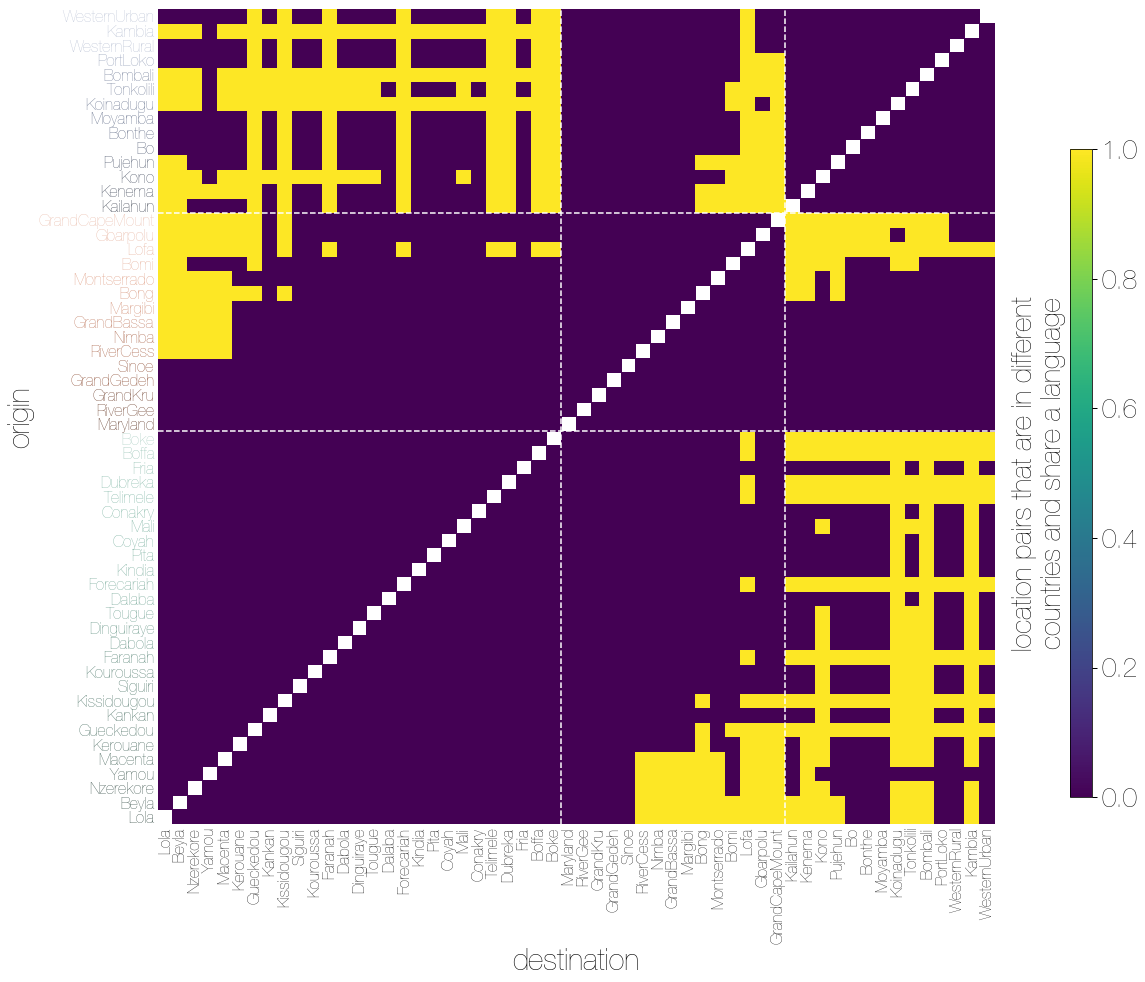

betweenGIN_SLE_Assymetry 0.0


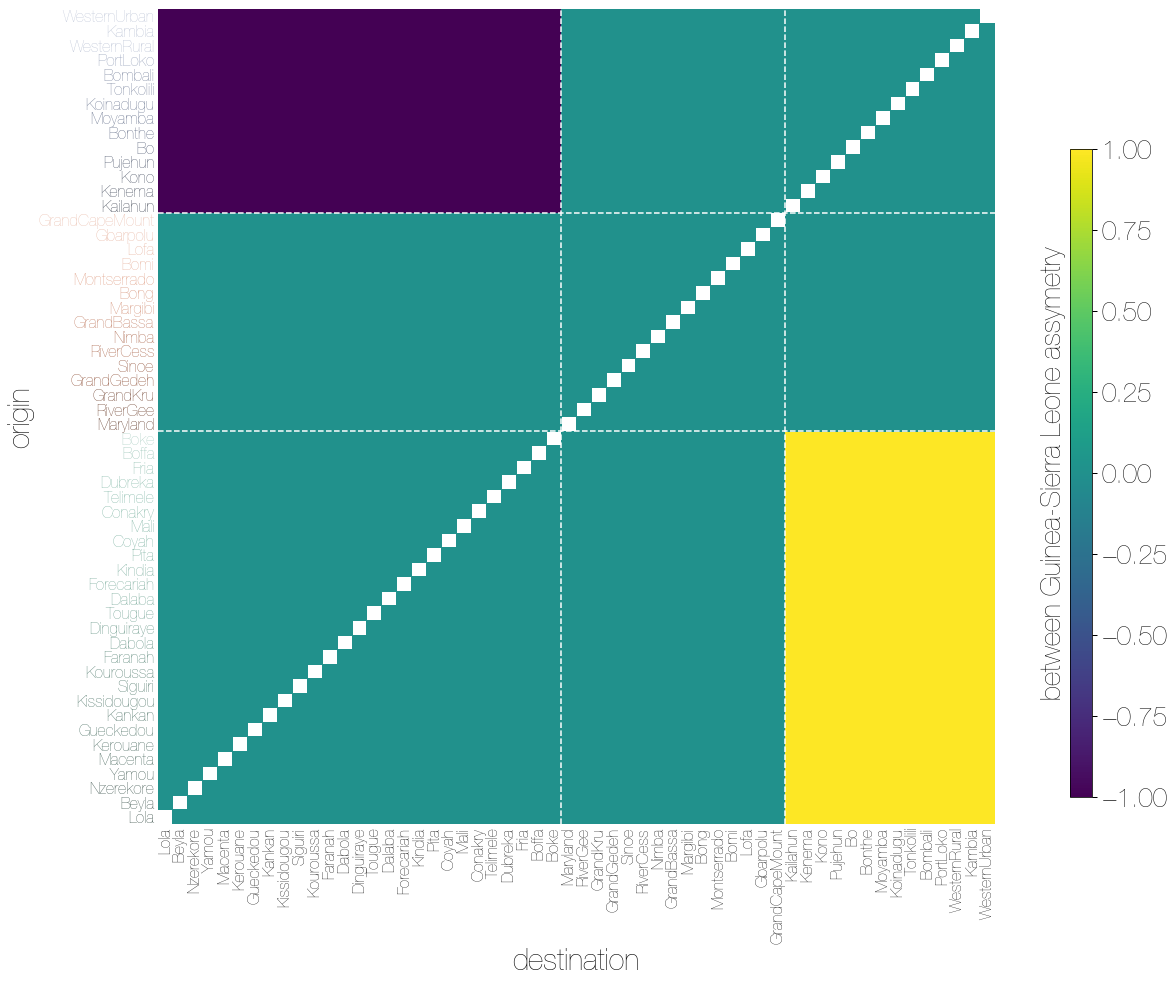

greatCircleDistances 3080.0


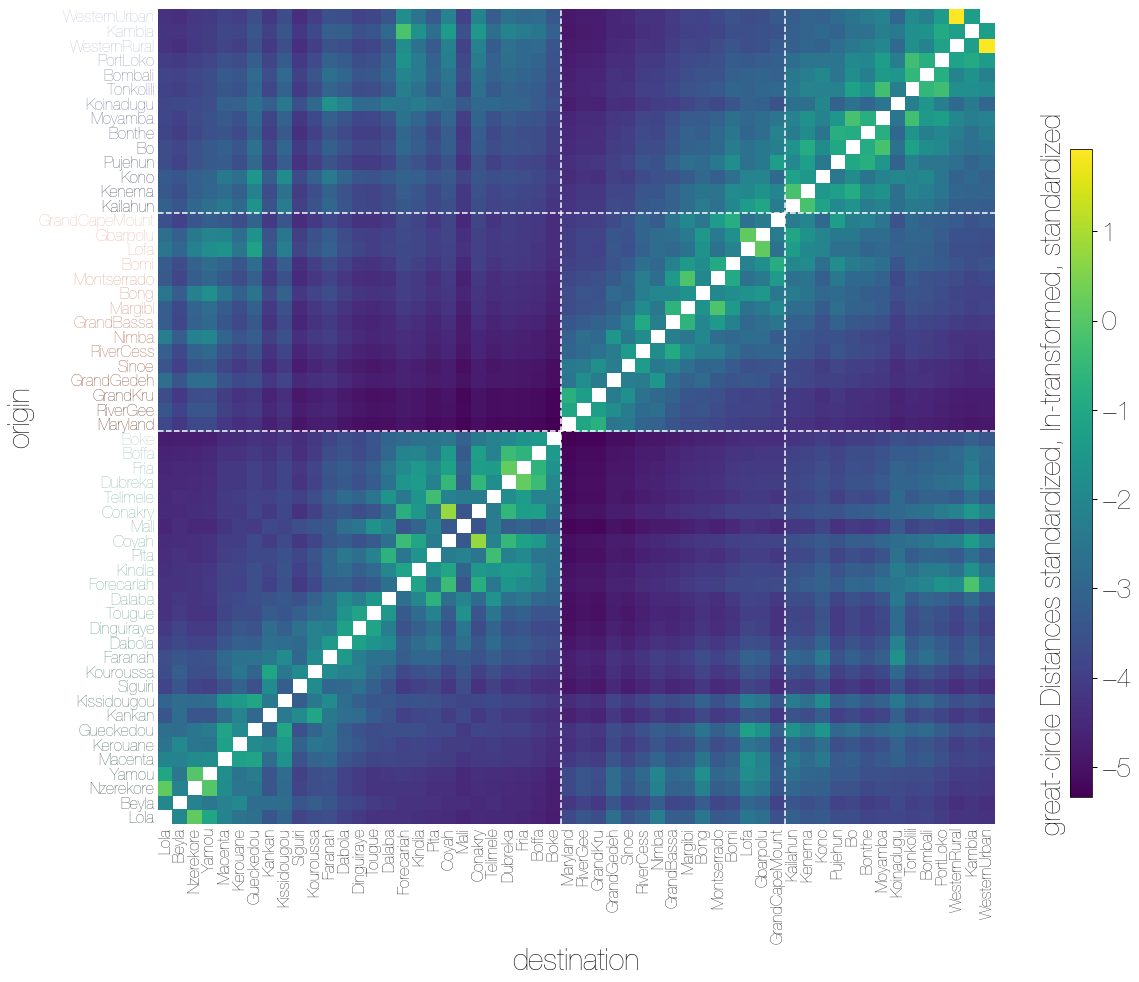

within_country 1094.0


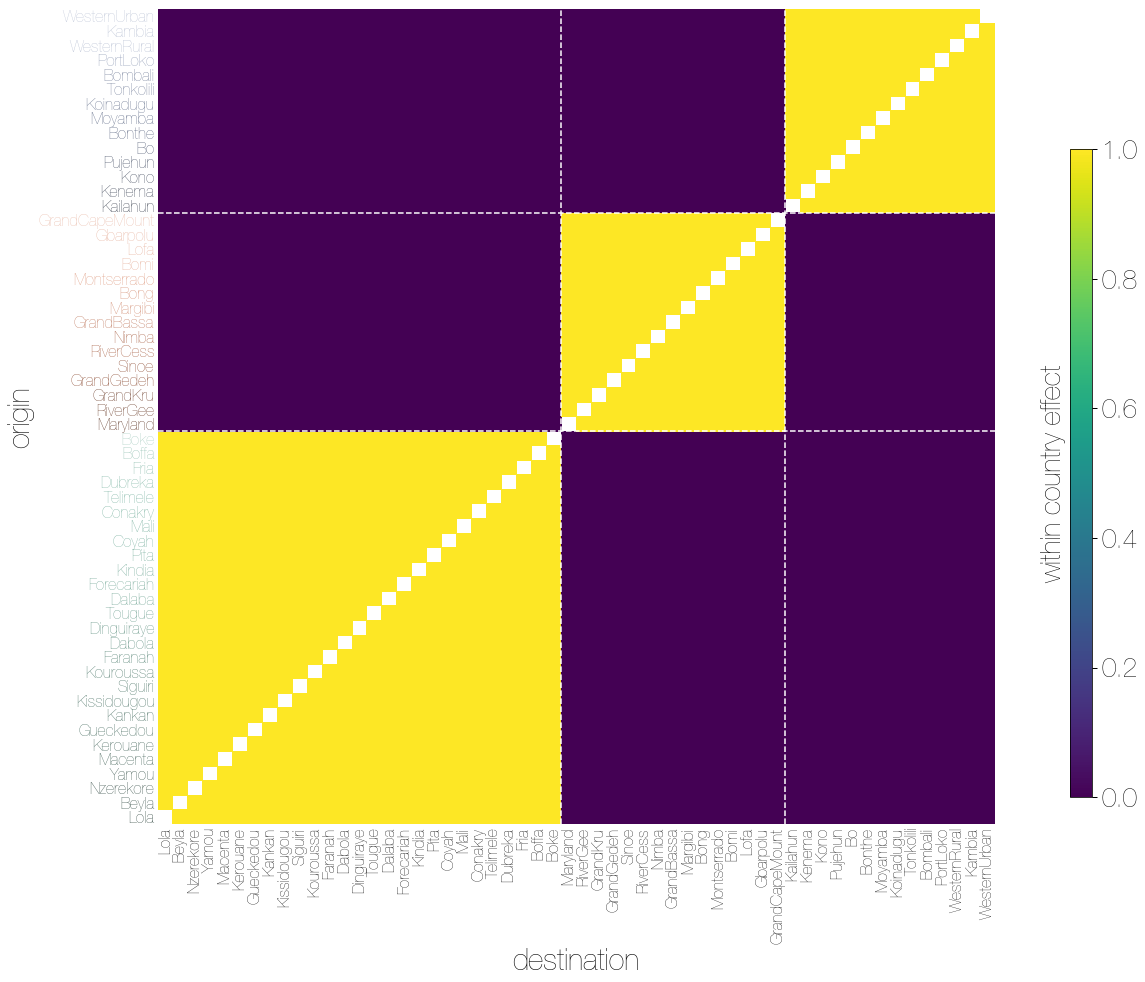

national_border_shared 210.0


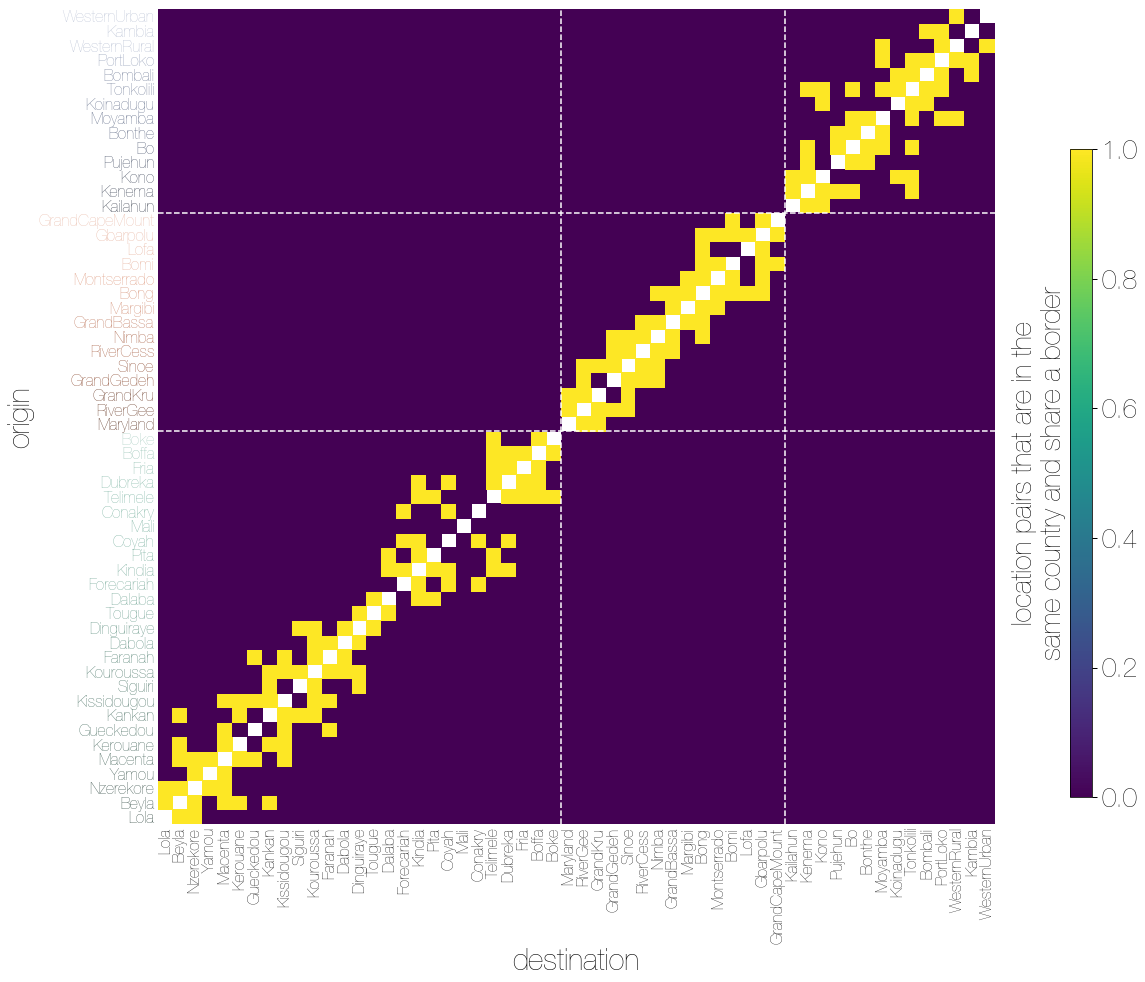

betweenLBR_SLE_Assymetry 0.0


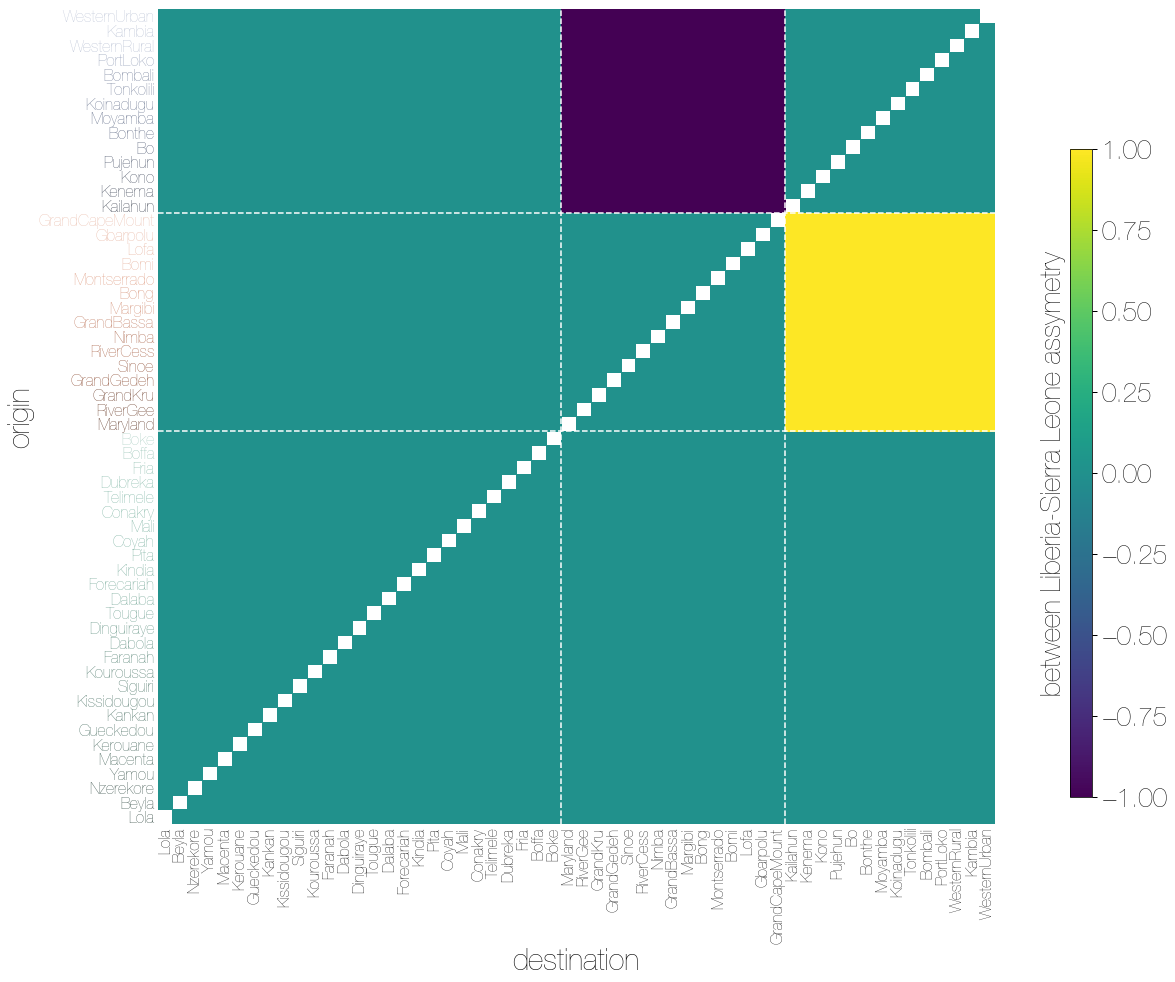

In [6]:
# required=['destinationTmpss','destinationPrecss','withinCountry','destinationsample','destinationTemp']

country_rank={x:[popCentres[y][0] for y in location_to_country.keys() if location_to_country[y]==x][0] for x in required_countries}
required=predictor_matrices.keys()
print country_rank
if normalize_by=='PCA1':
    sorted_locations=sorted(xml_districts,key=lambda x:(-country_rank[location_to_country[x]],-normalized_coords[x]))
elif normalize_by=='PCA2':
    sorted_locations=sorted(xml_districts,key=lambda x:(location_to_country[x],normalized_coords[x]))

# cmap=mpl.cm.Spectral_r
cmap=mpl.cm.get_cmap('viridis')

## iterate through predictors
for predictor in required:
    ## only produce heatmap representation if it's not a "destination" or "origin" predictor
    if 'destination' not in predictor and 'origin' not in predictor:
        empty=np.zeros((len(xml_districts),len(xml_districts)))
        empty.fill(np.nan)
        analysis=pd.DataFrame(empty,index=sorted_locations,columns=sorted_locations)
        
        ## start figure
        fig,ax = plt.subplots(figsize=(15,15),facecolor='w')

        ## identify matrix coordinates of predictor
        ## if it's a distance predictor - invert value
        for ind,value in enumerate(predictor_matrices[predictor]):
            ori,dest=matrix_index[ind]
            oriX,oriY=popCentres[ori]
            destX,destY=popCentres[dest]

            if 'Distance' in predictor or 'KL' in predictor:
                value=1-value
                
            analysis[dest][ori]=value

        ## mask NaNs
        masked_array = np.ma.array(np.array(analysis),mask=np.isnan(analysis))

        print predictor,sum(analysis.sum())
        
        cmap.set_bad('k',1.)
        ## plot heatmap
        heatmap = ax.pcolor(masked_array,edgecolors='none', linewidths=0,cmap=cmap,alpha=1)

        ## make plot pretty
        ax.set_xticks(np.arange(0.5,len(sorted_locations)+0.5))
        ax.set_xticklabels([x for x in sorted_locations],rotation=90)
        ax.set_yticks(np.arange(0.5,len(sorted_locations)+0.5))
        ax.set_yticklabels([x for x in sorted_locations])
        ax.set_xlabel('destination',size=30)
        ax.set_ylabel('origin',size=30)
        ax.tick_params(size=0,labelsize=16)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        axcb = fig.add_axes([0.97, 0.15, 0.02, 0.6], frame_on=False)
        cb = mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=mpl.colors.Normalize(vmin=min(predictor_matrices[predictor]),vmax=max(predictor_matrices[predictor])),orientation='vertical',alpha=1.0,drawedges=False)

        axcb.yaxis.set_label_position("left")
        axcb.tick_params(axis='y',which='both',direction='out',size=5,labelsize=26,width=1,pad=5)
        
        break_at=6
        break_description='\n'.join([' '.join([y for y in predictor_description[predictor].split(' ')[x:x+break_at]]) for x in range(0,len(predictor_description[predictor].split(' ')),break_at)])
        #ax.text(0.01,0.95,'%s'%break_description,size=26,va='bottom',ha='left',transform=ax.transAxes)
        axcb.set_ylabel('%s'%break_description,{'fontsize':28})

        for tick in ax.yaxis.get_ticklabels():
            label=str(tick.get_text())
            tick.set_color(desaturate(colours[location_to_country[label]](normalized_coords[label]),0.8))

        countries_of_labels=[location_to_country[x] for x in sorted_locations]
        for c in range(len(countries_of_labels)-1):
            if countries_of_labels[c]!=countries_of_labels[c+1]:
                ax.axhline(c+1,ls='--',color='w')
                ax.axvline(c+1,ls='--',color='w')
            
#         plt.savefig(local_output+'EBOV_predictor_%s_heatmap.png'%predictor,dpi=100,bbox_inches='tight')
#         plt.savefig(local_output+'EBOV_predictor_%s_heatmap.pdf'%predictor,dpi=100,bbox_inches='tight')
        plt.show()

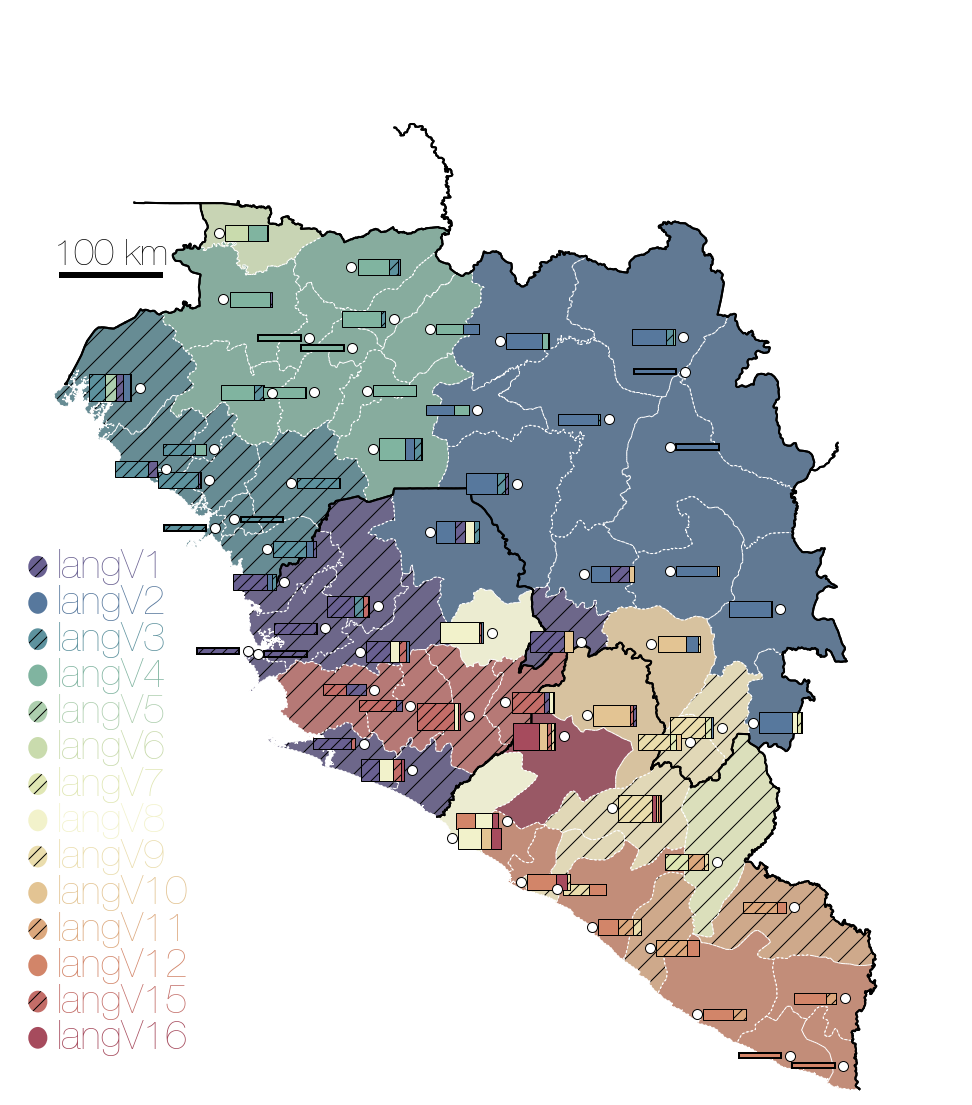

In [7]:
# ## import language sharing matrix
lang_path=path_to_dropbox+'Data/languages/languages.txt'

raw_matrix=[]
lang_locs=[]
for line in open(lang_path,'r'):
    l=line.strip('\n').split('\t')
    if 'ISO' in l[0]:
        languages=l[2:]
    else:
        raw_matrix.append(map(float,l[2:]))
        lang_locs.append(l[1])

lang_matrix={x:{y:np.nan for y in languages} for x in lang_locs}

speakers={x:[] for x in languages}
speaks={x:[] for x in lang_locs}

## unwrap matrix
for i,x in enumerate(raw_matrix):
    for j,y in enumerate(x):
        lang_matrix[lang_locs[i]][languages[j]]=float(raw_matrix[i][j])
        
        if lang_matrix[lang_locs[i]][languages[j]]>0:
            speakers[languages[j]].append(lang_locs[i])
            speaks[lang_locs[i]].append(languages[j])
languages=[l for l in languages if len(speakers[l])>0]

lcmap=mpl.cm.Spectral

language_colours={languages[q]:desaturate(lcmap((len(languages)-q)/float(len(languages))),0.6) for q in range(len(languages))}

fig,ax = plt.subplots(figsize=(20,20),facecolor='w')

for l,loc in enumerate(lang_locs):
    country=location_to_country[loc]
    
    if country in ['SLE','LBR','GIN']:
        countryColour=colours[country]
        c=desaturate(countryColour(normalized_coords[loc]),0.8)

        ## plot population centres
        lon,lat=popCentres[loc]

        ## convert percentage speakers to radians
        lang_order=sorted(languages,key=lambda w:-lang_matrix[loc][w])
        sizes=[lang_matrix[loc][a] for a in lang_order]
        N_spoken=sum([1 if x>0.0 else 0 for x in sizes])
    #     sizes=np.rad2deg([x*np.pi*2 for x in sizes])

        ## determines the height of bars
        frac=0.4

        ax.scatter(lon,lat,s=100,facecolor='w',edgecolor='k',zorder=2000)

        ## iterate over language proportions, plot pie wedges
        for s in range(len(sizes)):
            h=''
            if languages.index(lang_order[s])%2==0:
                h='//'

            left_right,up_down=textCorrection[loc]

            if left_right==0:
                adjustX=1
            else:
                adjustX=-20*frac

            if up_down==0:
                adjustY=0.0
            else:
                adjustY=-0.5

            x=lon+0.06*adjustX+sum(sizes[:s])*frac
            y=lat-0.025*N_spoken

            lw=1
            if sizes[s]==1.0:
                lw=2
            sl=mpl.patches.Rectangle((x,y),sizes[s]*frac,0.05*N_spoken,facecolor=language_colours[lang_order[s]],
                                      edgecolor='k',lw=lw,alpha=1.0,hatch=h,zorder=1000)

            ax.add_patch(sl)

        ## plot district borders
        for part in location_points[loc]:
            ax.plot(column(part,0),column(part,1),lw=1,color='w',ls=':',zorder=10)

        h=''
        if languages.index(lang_order[0])%2==0:
            h='/'

        ## plot district polygons coloured by shared language
        fc=desaturate(language_colours[lang_order[0]],0.7)
        ax.add_collection(PatchCollection(polygons[loc],facecolor=fc,hatch=h,edgecolor='k',lw=0,zorder=1))

for ling in range(len(languages)):
    y=(len(languages)-ling)/30.0

    h=''
    if languages.index(languages[ling])%2==0:
        h='//'

    circle=mpl.patches.Circle((0.03,y+0.02),radius=0.01,facecolor=language_colours[languages[ling]],
                              hatch=h,transform=ax.transAxes)
    ax.add_patch(circle)

    ax.text(0.05,y+0.01,'%s'%(languages[ling]),size=40,color=language_colours[languages[ling]],
            transform=ax.transAxes)

## add bar to indicate distance
ycoord=np.mean([4.3,12.7])
legend_y=12.0
legend_x1=-15
legend_x2=-14.08059

ax.plot([legend_x1,legend_x2],[legend_y,legend_y],color='k',lw=6)
ax.text(np.mean([legend_x1,legend_x2]),legend_y+0.04,'%.0f km'%metricDistance((legend_x1,legend_y),(legend_x2,legend_y)),size=36,va='bottom',ha='center')
    
for local_border in global_border:
    ax.plot(column(local_border,0),column(local_border,1),lw=2,color='k',zorder=201)

## make plot pretty
ax.set_aspect(1)
ax.tick_params(size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylim(ylimits)
ax.set_xlim(xlimits)

# plt.savefig(local_output+'EBOV_language_distribution_map_var3.png',dpi=300,bbox_inches='tight')
# plt.savefig(local_output+'EBOV_language_distribution_map_var3.pdf',dpi=300,bbox_inches='tight')

plt.show()

In [ ]:
unrolled_national=[]
unrolled_international=[]

#output_border=open('/Users/evogytis/Downloads/international_border.txt','w')

matrix_index={} ## predictor matrix indexing
lg=len(locations)

k=0
triangle_size = (lg*(lg-1)/2)
for i in range(len(locations)):
    for j in range(i+1,len(locations)):
        matrix_index[k] = (locations[i],locations[j])
        matrix_index[k + triangle_size] = (locations[j],locations[i])
        
        k += 1

def dist_score(L):
    return sum([metricDistance(L[x+1],L[x]) for x in range(len(L)-1)])

def findOrder(L):
    storeBest=L
    for i in range(len(L)):
        b=L[i:]+L[:i]
        score=dist_score(b)
        if score<=dist_score(storeBest):
            storeBest=b

    return storeBest   

border_output= open('/Users/evogytis/Downloads/international_border.txt','w')
for i in matrix_index.keys():
    locA,locB=matrix_index[i]
    ## get all points of a location
    countryA=location_to_country[locA]
    countryB=location_to_country[locB]
    
    pointsA=location_points['%s_%s'%(location_to_country[locA],locA)]
    pointsB=location_points['%s_%s'%(location_to_country[locB],locB)]

    ## location points can be split into parts - flatten list
    joinA=list([item for sublist in pointsA for item in sublist])
    joinB=list([item for sublist in pointsB for item in sublist])

    share_border=False
    common_points=share_points(joinA,joinB)

    p=0

    if common_points==True and countryA!=countryB:
        for polyA in pointsA:

            for polyB in pointsB:
                ol,rA,rB=overlap(map(tuple,polyA),map(tuple,polyB))
                ol+=[tuple(x) for x in rA for y in rB if metricDistance(x,y)<=0.001]

                frag=[]
                for pts in polyA:
                    if tuple(pts) in ol:
                        frag.append(tuple(pts))
                        
                frag=findOrder(frag)
                #print frag
                print>>border_output,'%s'%(frag)

border_output.close()

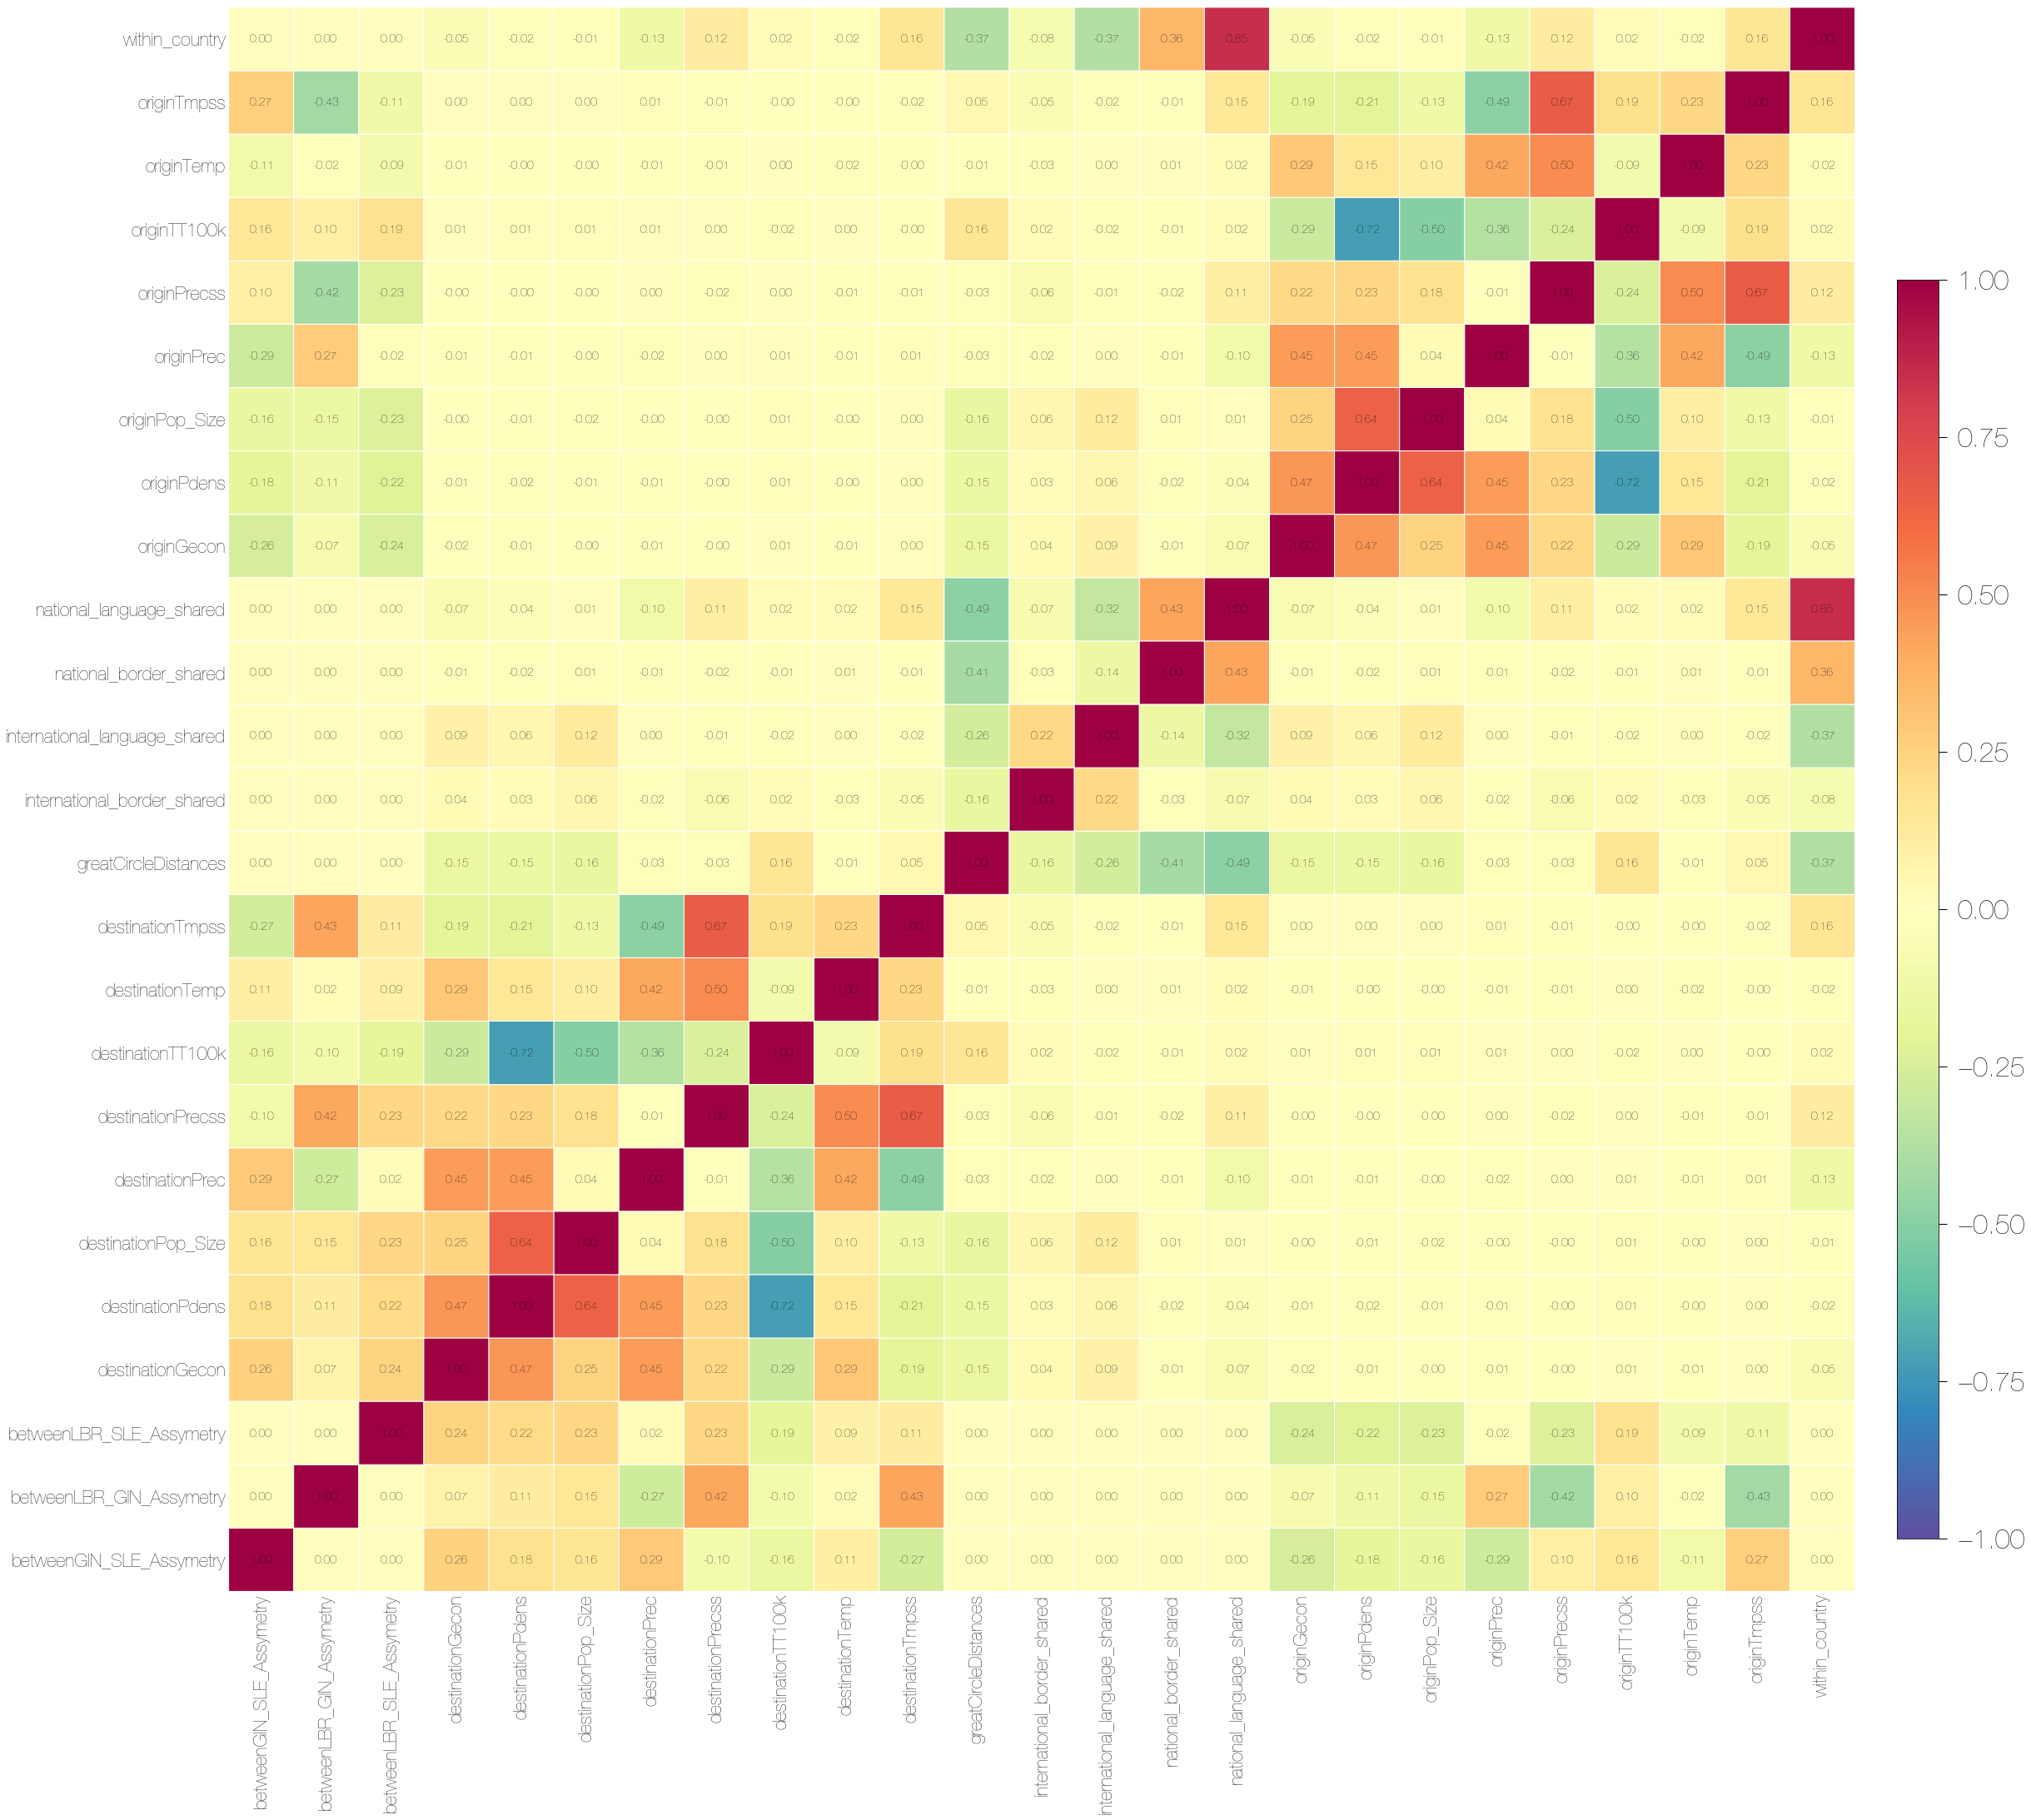

In [8]:
required=predictor_matrices.keys()

cmap=mpl.cm.Spectral_r

# start figure
fig,ax = plt.subplots(figsize=(35,35),facecolor='w')

sorted_required=sorted(required,key=lambda x:x)

empty=np.zeros((len(sorted_required),len(sorted_required)))
empty.fill(np.nan)
analysis=pd.DataFrame(empty,index=sorted_required,columns=sorted_required)

for i,predictorA in enumerate(required):
    #print '%30s%10.2f'%(predictorA,i/float(len(required)))
    for j,predictorB in enumerate(required):

        matrixA=predictor_matrices[predictorA]
        matrixB=predictor_matrices[predictorB]
        
        coeff,pvalue=spearmanr(matrixA, matrixB)
        analysis[predictorA][predictorB]=coeff

        ax.text(sorted_required.index(predictorA)+0.5,sorted_required.index(predictorB)+0.5,'%.2f'%(coeff),size=14,va='center',ha='center')

masked_array = np.ma.array(np.array(analysis),mask=np.isnan(analysis))

## plot heatmap of the predictor matrix
heatmap = ax.pcolor(masked_array,edgecolors='w', lw=1,cmap=cmap,alpha=1,norm=mpl.colors.Normalize(-1,1))

## make plot pretty
ax.set_xticks(np.arange(0.5,len(required)+0.5))
ax.set_yticks(np.arange(0.5,len(required)+0.5))
ax.set_xticklabels(sorted_required,rotation=90)
ax.set_yticklabels(sorted_required)
ax.set_xlim(0,len(required))
ax.set_ylim(0,len(required))
ax.tick_params(size=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

axcb = fig.add_axes([0.92, 0.15, 0.02, 0.6], frame_on=False)

cb = mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=mpl.colors.Normalize(vmin=-1,vmax=1),orientation='vertical',alpha=1.0,drawedges=False)

axcb.yaxis.set_label_position("left")
axcb.tick_params(axis='y',which='both',direction='out',size=12,width=1,pad=10)
plt.setp(axcb.get_yticklabels(),size=32,name=typeface)

for tick in axcb.yaxis.get_ticklines():
    tick.set_markersize(10)

plt.show()

originPdens	originGecon	0.471	0.0002
originPop_Size	originGecon	0.249	0.0639
originPop_Size	originPdens	0.642	0.0000
originPrec	originGecon	0.452	0.0005
originPrec	originPdens	0.452	0.0005
originPrec	originPop_Size	0.035	0.7964
originPrecss	originGecon	0.223	0.0986
originPrecss	originPdens	0.228	0.0905
originPrecss	originPop_Size	0.181	0.1817
originPrecss	originPrec	-0.006	0.9621
originTT100k	originGecon	-0.292	0.0289
originTT100k	originPdens	-0.724	0.0000
originTT100k	originPop_Size	-0.502	0.0001
originTT100k	originPrec	-0.363	0.0060
originTT100k	originPrecss	-0.242	0.0721
originTemp	originGecon	0.291	0.0297
originTemp	originPdens	0.152	0.2632
originTemp	originPop_Size	0.104	0.4454
originTemp	originPrec	0.419	0.0013
originTemp	originPrecss	0.504	0.0001
originTemp	originTT100k	-0.092	0.4978
originTmpss	originGecon	-0.194	0.1527
originTmpss	originPdens	-0.207	0.1255
originTmpss	originPop_Size	-0.129	0.3445
originTmpss	originPrec	-0.490	0.0001
originTmpss	originPrecss	0.665	0.0000
origin

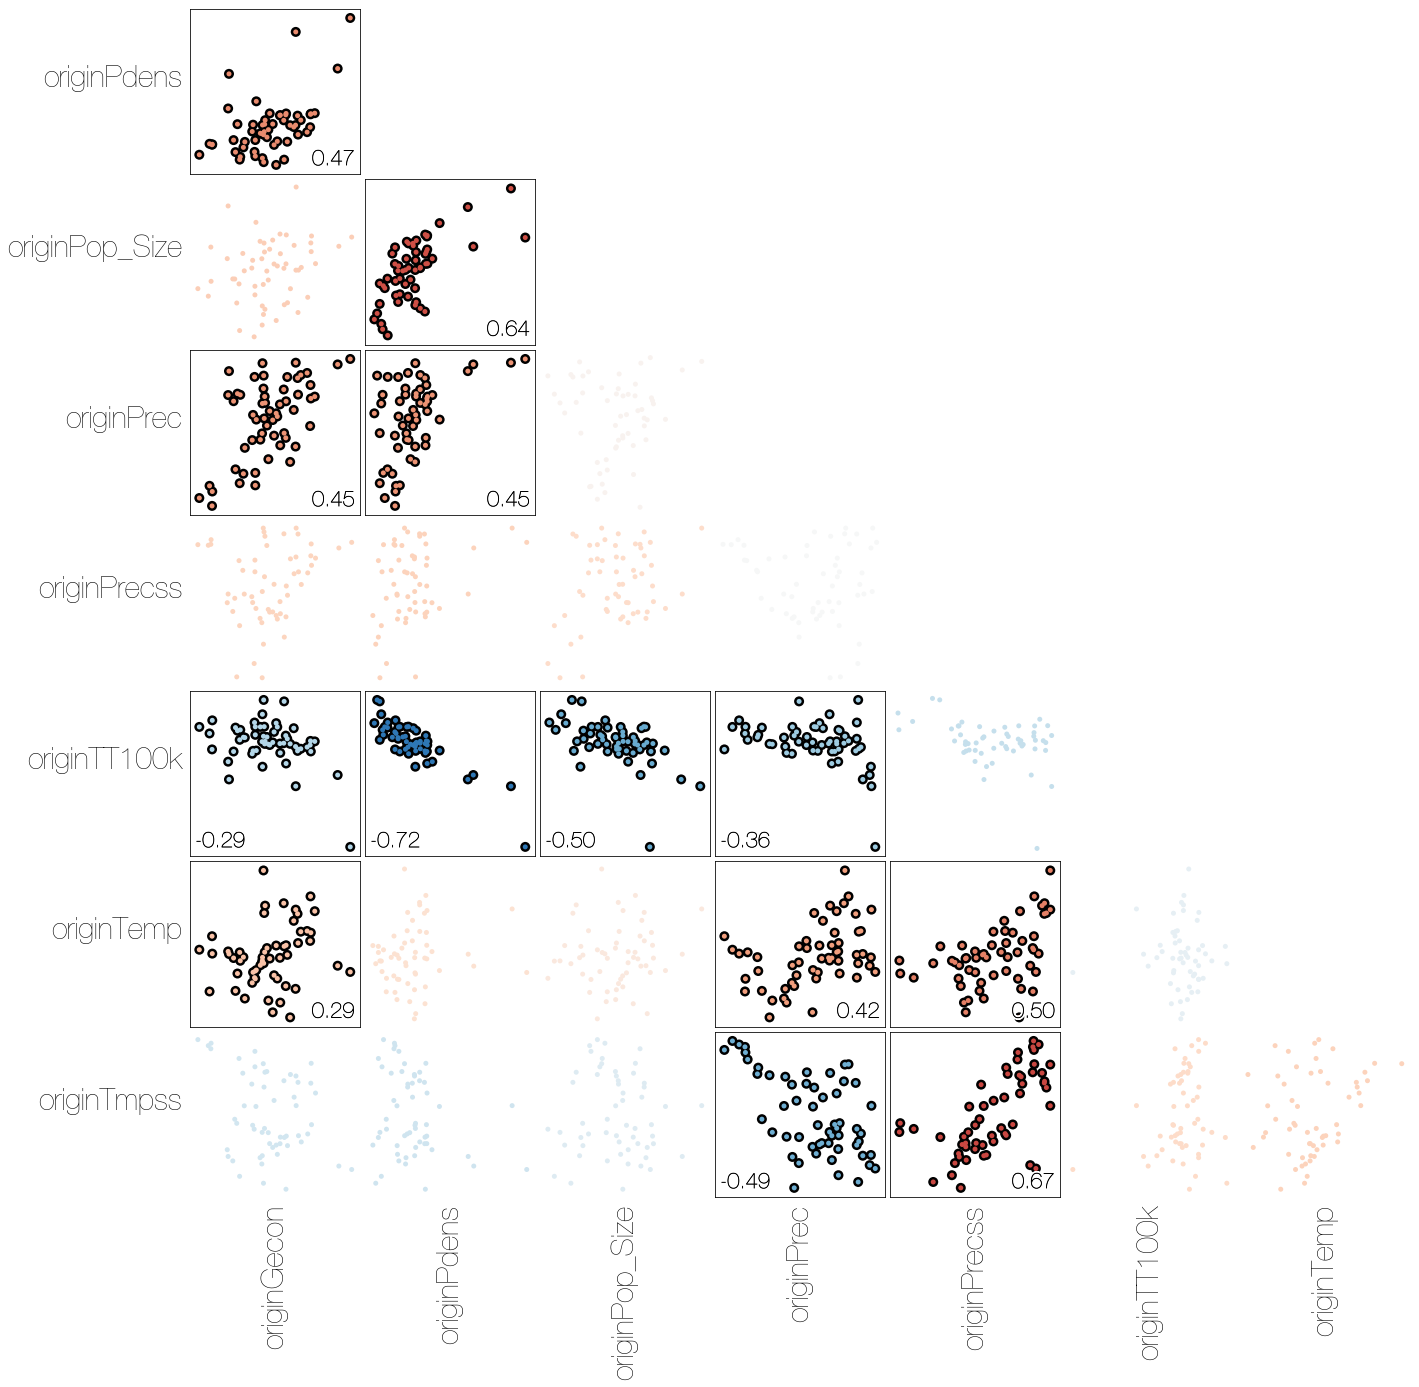

In [29]:
sorted_required=sorted([w for w in predictor_matrices.keys() if 'origin' in w],key=lambda x:x)

empty=np.zeros((len(sorted_required),len(sorted_required)))
empty.fill(np.nan)
analysis=pd.DataFrame(empty,index=sorted_required,columns=sorted_required)

cmap=mpl.cm.RdBu_r

fig,ax = plt.subplots(figsize=(25,25),facecolor='w')

gs = gridspec.GridSpec(len(sorted_required), len(sorted_required),hspace=0.03,wspace=0.03)

effects=[path_effects.Stroke(linewidth=4, foreground='white'),path_effects.Stroke(linewidth=0.5, foreground='black')]

for pA,predictorA in enumerate(sorted_required):
    for pB,predictorB in enumerate(sorted_required):
        
        if pA>pB:
            ax = plt.subplot(gs[pA, pB])
            
            xs=[]
            ys=[]
            done=[]
            for i,x in enumerate(predictor_matrices[predictorA]):
                origin,destination=matrix_index[i]
                if origin not in done:
                    xs.append(predictor_matrices[predictorB][i])
                    ys.append(predictor_matrices[predictorA][i])
                    done.append(origin)

            spear,pval=spearmanr(xs,ys)
            if pval>0.05:
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
            else:
                ax.scatter(xs,ys,s=100,facecolor='k',edgecolor='none',zorder=0)
                if spear>0.0:
                    ax.text(0.97,0.03,'%.2f'%(spear),va='bottom',ha='right',transform=ax.transAxes,path_effects=effects,zorder=1000)
                else:
                    ax.text(0.03,0.03,'%.2f'%(spear),va='bottom',ha='left',transform=ax.transAxes,path_effects=effects,zorder=1000)
                    
            ax.scatter(xs,ys,s=25,facecolor=cmap((spear+1.0)/2.0),edgecolor='none',zorder=100)

            if pB==0:
                ax.set_ylabel(predictorA,rotation='horizontal',size=30)
                ax.yaxis.get_label().set_horizontalalignment("right")
            if pA==len(sorted_required)-1:
                ax.set_xlabel(predictorB,rotation=90,size=30)
                
            ax.tick_params(size=0)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            
            print '%s\t%s\t%.3f\t%.4f'%(predictorA,predictorB,spear,pval)

#plt.savefig(local_output+'EBOV_location_predictor_correlations.png',dpi=300,bbox_inches='tight')
#plt.savefig(local_output+'EBOV_location_predictor_correlations.pdf',dpi=300,bbox_inches='tight')
plt.show()